# **Algoritmo de Corrección del presupuesto de la Nación Argentina**

La administración pública nacional argentina es un sistema complejo que requiere de una adecuada planificación y ejecución presupuestaria para su funcionamiento eficiente. Sin embargo, en la práctica, se presentan una serie de dificultades que impiden que los presupuestos se ajusten a las necesidades reales del Estado y la población. Por ello, es de suma importancia crear una herramienta que nos permita realizar las correcciones presupuestarias necesarias a un mundo tan cambiante mediante nuevas tecnologías.

Realizaremos un análisis exahustivo del presupuesto del último año, y entrenar un modelo eficiente para un mejor funcionamiento de las prestaciones del Estado en el futuro.

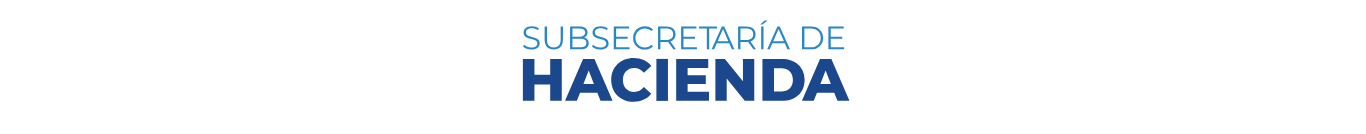

# **Abstracto**

En respuesta a las deficiencias observadas en la gestión presupuestaria del estado argentino en los últimos años, se propone el desarrollo de un algoritmo de corrección presupuestaria que aproveche las nuevas herramientas tecnológicas para promover la eficacia y la austeridad en la administración pública. Este algoritmo se dirige principalmente a dirigentes políticos y directivos gubernamentales, proporcionándoles una herramienta analítica para optimizar la asignación y ejecución de recursos financieros.

El contexto comercial de este proyecto se enmarca en la necesidad de mejorar la eficiencia del gasto público y garantizar una gestión presupuestaria responsable. Esto implica considerar variables como la programación inicial en decisión administrativa, la programación inicial ajustada, la programación anual vigente por trimestre y la programación acumulada al trimestre.

El objetivo principal del algoritmo es predecir las modificaciones necesarias para evitar déficits presupuestarios significativos, permitiendo así una gestión más efectiva de los recursos financieros del estado. Para lograr este objetivo, se explorarán preguntas de interés y se formularán hipótesis específicas que orienten el desarrollo y la validación del modelo.

En resumen, este proyecto busca integrar la tecnología en la gestión presupuestaria del estado argentino, proporcionando una herramienta innovadora y precisa para mejorar la toma de decisiones financieras y promover la transparencia y eficacia en la administración pública.

# Import de DataSets

In [390]:
#from google.colab import drive
#drive.mount("/content/drive")

# Importar las bibliotecas necesarias
from sklearn.ensemble import RandomForestRegressor  # Para crear el modelo de regresión Random Forest
from sklearn.model_selection import train_test_split  # Para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn import metrics  # Para evaluar el rendimiento del modelo
import pandas as pd  # Para manejar datos en DataFrames
import numpy as np  # Para realizar operaciones matemáticas
import matplotlib.pyplot as plt  # Para visualizar datos
import seaborn as sns  # Para crear gráficos más avanzados (opcional)
import matplotlib.colors as mcolors # Para darle distintos colores a matplotlib en pos de la presentación ejecutiva
from matplotlib.colors import LinearSegmentedColormap # Para darle distintos colores a matplotlib en pos de la presentación ejecutiva
import featuretools as ft
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from xgboost import XGBRegressor


# Definir los paths a los archivos CSV
#path1 = "/content/drive/MyDrive/DataScience - Mariano Fernandez/ejecucion-fisica-trimestre-1-2023.csv"
#path2 = "/content/drive/MyDrive/DataScience - Mariano Fernandez/ejecucion-fisica-trimestre-2-2023.csv"
#path3 = "/content/drive/MyDrive/DataScience - Mariano Fernandez/ejecucion-fisica-trimestre-3-2023.csv"

# Definir los paths a los archivos CSV
path1 = r"C:\Users\mjhfernandez\Documents\datasets presupuesto\ejecucion-fisica-trimestre-1-2023.csv"
path2 = r"C:\Users\mjhfernandez\Documents\datasets presupuesto\ejecucion-fisica-trimestre-2-2023.csv"
path3 = r"C:\Users\mjhfernandez\Documents\datasets presupuesto\ejecucion-fisica-trimestre-3-2023.csv"

# Leer los datos de los archivos CSV en DataFrames
ejfistr1 = pd.read_csv(path1)  # Cargar los datos del trimestre 1
ejfistr2 = pd.read_csv(path2)  # Cargar los datos del trimestre 2
ejfistr3 = pd.read_csv(path3)  # Cargar los datos del trimestre 3

In [391]:
path4 = r"C:\Users\mjhfernandez\Documents\datasets presupuesto\2019_OrcamentoDespesa.csv"

data = pd.read_csv(path4, sep=";", encoding='latin-1')

In [392]:
#!pip install kaggle

In [393]:
#import os
#os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [394]:
#!kaggle datasets download -d caesarlupum/brazilgovernmentbudget

In [395]:
#import zipfile

# Define the path to your zip file
#file_path = '/content/brazilgovernmentbudget.zip'  # Replace 'your_file.zip' with your file's name

# Unzip the file to a specific destination
#with zipfile.ZipFile(file_path, 'r') as zip_ref:
#    zip_ref.extractall('/content/drive/MyDrive/kaggle')  # Replace 'destination_folder' with your desired folder

In [396]:
#data = pd.read_csv('/content/drive/MyDrive/kaggle/2019_OrcamentoDespesa.csv', sep=";", encoding='latin-1')

**Definición de funciones**

Por entregas anteriores, me pareció más prolijo declarar las funciones de los gráficos previo a el análisis propio de los datos para que el llamado al gráfico sea de sólo una línea.

In [397]:
def scatter(df, x_column, y_column, percentage_difference_column, output_filename):
    # Crear un mapa de colores personalizado, invirtiendo los colores
    colors = ['#2E7D33', '#2CB9EE']  # Verde oscuro a azul claro
    n_bins = 100  # Número de bins en el colormap
    cmap_name = 'custom_cmap'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

    # Crear un gráfico de dispersión con las columnas especificadas
    plt.figure(figsize=(10, 8))
    scatter_plot = plt.scatter(df[x_column], df[y_column], c=df[percentage_difference_column], cmap=cm)

    # Agregar etiquetas a los ejes
    plt.xlabel(x_column.replace('_', ' ').title())
    plt.ylabel(y_column.replace('_', ' ').title())

    # Agregar un título al gráfico
    plt.title('Porcentaje de Diferencia entre Programación y Ejecutado (Primer Trimestre 2023)')

    # Agregar una cuadrícula al gráfico
    plt.grid()

    # Agregar una barra de colores al gráfico
    colorbar = plt.colorbar(scatter_plot)
    colorbar.set_label('Porcentaje Diferencia')

    # Guardar el gráfico como PNG con fondo transparente y 300 dpi
    plt.savefig(output_filename, dpi=300, transparent=True)

    # Mostrar el gráfico
    plt.show()


In [398]:
def heatmap(df, percentage_difference_column, dist_col, desc_col, output_filename):
    # Crear una tabla de bins para la columna de distribución
    bins = pd.qcut(df[dist_col], q=18, labels=False, precision=2, duplicates='drop')
    df[f'{dist_col}_bin'] = bins

    # Creación del Heatmap
    plt.figure(figsize=(12, 10))  # Ajustar el tamaño de la figura

    # Agrupar los datos por descripción y bin de la distribución
    heatmap_data = df.groupby([desc_col, f'{dist_col}_bin'])[percentage_difference_column].mean().reset_index()

    # Crear una tabla pivot para el gráfico de calor
    heatmap_pivot = heatmap_data.pivot_table(index=desc_col, columns=f'{dist_col}_bin', values=percentage_difference_column, aggfunc='mean')

    # Rellenar los valores faltantes con 0 (esto podría no ser necesario si los datos ya están completos)
    heatmap_pivot.fillna(0, inplace=True)

    # Crear el mapa de colores personalizado
    colors = ['#242C4F', '#FFFFFF', '#C62828']  # Azul oscuro, blanco (neutro), rojo oscuro
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

    # Crear el gráfico de calor
    sns.heatmap(data=heatmap_pivot, annot=True, cmap=cmap, fmt=".2f", linewidths=.5, annot_kws={"size": 8}, square=True)

    # Agregar etiquetas al gráfico
    plt.title(f'Heatmap de Desviación por {desc_col.title()} - Trimestre 3')
    plt.xlabel(f'Rango de {dist_col.title()}')
    plt.ylabel(desc_col.title())

    # Ajustar los márgenes para evitar que los nombres se corten
    plt.tight_layout()

    # Guardar el gráfico como PNG con fondo transparente y 300 dpi, ajustando el recorte y agregando un espacio adicional
    plt.savefig(output_filename, dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.5)

    # Mostrar el mapa de calor
    plt.show()


In [399]:
def horizontal_boxplot(df, percentage_difference_col, desc_col, output_filename):
    # Establecer el tamaño de la figura con un aspecto más ancho y menos alto
    plt.figure(figsize=(15, 10))

    # Crear el boxplot horizontal con el color especificado para las cajas
    sns.boxplot(y=desc_col, x=percentage_difference_col, data=df, width=0.5, whis=20)

    # Agregar un título y etiquetas
    plt.title(f'Boxplot de {percentage_difference_col.title()} por {desc_col.title()} - Trimestre 1')
    plt.xlabel(percentage_difference_col.title())
    plt.ylabel(desc_col.title())

    # Ajustar los márgenes para evitar que los nombres se corten
    plt.tight_layout()

    plt.xticks(rotation=90)  # Especificar los ticks y rotarlos para que sean legibles
    plt.tick_params(axis='x', which='major', labelsize=8)  # Reducir el tamaño de la fuente de los ticks


    # Guardar el gráfico como PNG con fondo transparente y 300 dpi
    plt.savefig(output_filename, dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.5)

    # Mostrar el gráfico
    plt.show()


In [400]:
def pareto(nombreDataFrame, nombreColumna, nombreNuevoColumna, nombreArchivo):
    nombreDataFrame[nombreColumna] = pd.Categorical(nombreDataFrame[nombreColumna])  # categorizar la columna

    tab_pareto = pd.crosstab(index=nombreDataFrame[nombreColumna], columns=nombreNuevoColumna)  # hacer tabla de frecuencia de columna
    tab_pareto = tab_pareto.sort_values(by=nombreNuevoColumna, ascending=False)  # ordenar la tabla de frecuencias en orden descendente
    tab_pareto['pareto_porcentaje'] = 100 * tab_pareto[nombreNuevoColumna].cumsum() / tab_pareto[nombreNuevoColumna].sum()  # agregar columna con porcentaje acumulado

    # Construimos la gráfica
    fig, axes = plt.subplots(figsize=(10, 6))  # tamaño de la figura figsize= x,y
    ax1 = tab_pareto[nombreNuevoColumna].plot(kind='bar', color='#242C4F', ax=axes, width=0.8)  # agregar gráfico de barras con color especificado
    ax2 = tab_pareto['pareto_porcentaje'].plot(kind='line', marker='D', color='#F79525', ax=axes, secondary_y=True)  # agregar gráfico de porcentaje con color especificado
    ax2.set_ylim([0, 140])  # poner un límite al eje y de 140

    # Anotar los paretos
    words = list(tab_pareto.pareto_porcentaje.round(1))  # crear una lista con los valores de pareto
    for i, word in enumerate(words):  # hacer un for para agregar cada etiqueta pareto
        ax2.annotate(f'{word}%', xy=(i, tab_pareto['pareto_porcentaje'][i]), ha="center", va="bottom")

    # Anotar los valores de las barras
    words = list(tab_pareto[nombreNuevoColumna])
    for i, word in enumerate(words):
        ax1.annotate(word, xy=(i, word), ha="center", va="bottom")

    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    ax1.set_ylabel(nombreNuevoColumna)
    ax2.set_ylabel('Porcentaje Acumulado')
    plt.title('Gráfico de Pareto')

    # Guardar el gráfico como PNG con fondo transparente y 300 dpi
    plt.savefig(nombreArchivo, dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.5)

    plt.show()  # imprimir gráfico

In [401]:
def vertical_boxplot(df, x_col, y_col, output_filename):
    # Establecer el tamaño de la figura
    plt.figure(figsize=(9, 7))

    # Crear el boxplot horizontal con el color especificado para las cajas
    boxplot = sns.boxplot(x=x_col, y=y_col, data=df, width=0.5, whis=20, palette=['#242C4F'])

    # Configurar el color de las cajas y los bigotes
    for i, artist in enumerate(boxplot.artists):
        # Setear el color de las cajas
        artist.set_edgecolor('black')
        artist.set_facecolor('#242C4F')

        # Iterar sobre las líneas que forman los bigotes
        for j in range(i*6, i*6+6):
            plt.setp(boxplot.lines[j], color='black')

    # Agregar un título y etiquetas
    plt.title(f'Boxplot de {y_col.replace("_", " ").title()} por {x_col.replace("_", " ").title()}')
    plt.ylabel(y_col.replace("_", " ").title())
    plt.xlabel(x_col.replace("_", " ").title())

    # Rotar las etiquetas del eje x
    plt.xticks(rotation=90, ha='right')

    # Guardar el gráfico como PNG con fondo transparente y 300 dpi
    plt.savefig(output_filename, dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.5)

    # Mostrar el gráfico
    plt.show()


# Proceso de Data Wrangling

In [402]:
missing_data1 = ejfistr1.isnull()
missing_data1.head(5)

,ejercicio_presupuestario,trimestre,finalidad_id,finalidad_desc,funcion_id,funcion_desc,jurisdiccion_id,jurisdiccion_desc,subjurisdiccion_id,subjurisdiccion_desc,...,programacion_anual_vig_trim1,programacion_trim1,programacion_acumulada_trim1,ejecutado_vigente_trim1,ejecutado_acumulado_trim1,porc_desvio_acum_trim1,causa_desvio,causa_desvio_detalle,causa_desvio_comentario,ultima_actualizacion_fecha
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [403]:
missing_data2 = ejfistr2.isnull()
missing_data2.head(5)

,ejercicio_presupuestario,trimestre,finalidad_id,finalidad_desc,funcion_id,funcion_desc,jurisdiccion_id,jurisdiccion_desc,subjurisdiccion_id,subjurisdiccion_desc,...,programacion_anual_vig_trim2,programacion_trim2,programacion_acumulada_trim2,ejecutado_vigente_trim2,ejecutado_acumulado_trim2,porc_desvio_acum_trim2,causa_desvio,causa_desvio_detalle,causa_desvio_comentario,ultima_actualizacion_fecha
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [404]:
missing_data3 = ejfistr3.isnull()
missing_data3.head(5)

,ejercicio_presupuestario,trimestre,finalidad_id,finalidad_desc,funcion_id,funcion_desc,jurisdiccion_id,jurisdiccion_desc,subjurisdiccion_id,subjurisdiccion_desc,...,programacion_anual_vig_trim3,programacion_trim3,programacion_acumulada_trim3,ejecutado_vigente_trim3,ejecutado_acumulado_trim3,porc_desvio_acum_trim3,causa_desvio,causa_desvio_detalle,causa_desvio_comentario,ultima_actualizacion_fecha
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Trimestre 1

In [405]:
for column in missing_data1.columns.values.tolist():
    print(column)
    print (missing_data1[column].value_counts())
    print("")

ejercicio_presupuestario
ejercicio_presupuestario
False    2328
Name: count, dtype: int64

trimestre
trimestre
False    2328
Name: count, dtype: int64

finalidad_id
finalidad_id
False    2328
Name: count, dtype: int64

finalidad_desc
finalidad_desc
False    2328
Name: count, dtype: int64

funcion_id
funcion_id
False    2328
Name: count, dtype: int64

funcion_desc
funcion_desc
False    2328
Name: count, dtype: int64

jurisdiccion_id
jurisdiccion_id
False    2328
Name: count, dtype: int64

jurisdiccion_desc
jurisdiccion_desc
False    2328
Name: count, dtype: int64

subjurisdiccion_id
subjurisdiccion_id
False    2328
Name: count, dtype: int64

subjurisdiccion_desc
subjurisdiccion_desc
False    2328
Name: count, dtype: int64

servicio_id
servicio_id
False    2328
Name: count, dtype: int64

servicio_desc
servicio_desc
False    2328
Name: count, dtype: int64

programa_id
programa_id
False    2328
Name: count, dtype: int64

programa_desc
programa_desc
False    2328
Name: count, dtype: int64



In [406]:
ejfistr1['programacion_trim1'] = pd.to_numeric(ejfistr1['programacion_trim1'], errors='coerce')
ejfistr1['ejecutado_vigente_trim1'] = pd.to_numeric(ejfistr1['ejecutado_vigente_trim1'], errors='coerce')
ejfistr1['ejecutado_vigente_trim1'].replace('', np.nan, inplace=True)
ejfistr1.dropna(subset=['programacion_inicial_DA'], inplace=True)
ejfistr1 = ejfistr1.dropna(subset=['programacion_trim1', 'programacion_acumulada_trim1'])
ejfistr1.dropna(subset=['ejecutado_acumulado_trim1', 'ejecutado_vigente_trim1'], inplace=True)
ejfistr1['porcentaje_diferencia'] = ((ejfistr1['programacion_trim1'] - ejfistr1['ejecutado_vigente_trim1']) / ejfistr1['programacion_trim1']) * 100

promedio_diferencia = ejfistr1['porcentaje_diferencia'].mean()

ejfistr1['ejecutado_vigente_trim1'].fillna(ejfistr1['programacion_trim1'] * (1 - promedio_diferencia / 100), inplace=True)

# Reemplazar los valores nulos en 'causa_desvio_comentario' con "No hay detalle"
ejfistr1['causa_desvio_comentario'].fillna("No hay detalle", inplace=True)


C:\Users\mjhfernandez\AppData\Local\Temp\ipykernel_11588\106636793.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ejfistr1['ejecutado_vigente_trim1'].replace('', np.nan, inplace=True)
C:\Users\mjhfernandez\AppData\Local\Temp\ipykernel_11588\106636793.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [407]:
missing_data1 = ejfistr1.isnull()
missing_data1.head(5)

,ejercicio_presupuestario,trimestre,finalidad_id,finalidad_desc,funcion_id,funcion_desc,jurisdiccion_id,jurisdiccion_desc,subjurisdiccion_id,subjurisdiccion_desc,...,programacion_trim1,programacion_acumulada_trim1,ejecutado_vigente_trim1,ejecutado_acumulado_trim1,porc_desvio_acum_trim1,causa_desvio,causa_desvio_detalle,causa_desvio_comentario,ultima_actualizacion_fecha,porcentaje_diferencia
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [408]:
for column in missing_data1.columns.values.tolist():
    print(column)
    print (missing_data1[column].value_counts())
    print("")

ejercicio_presupuestario
ejercicio_presupuestario
False    1874
Name: count, dtype: int64

trimestre
trimestre
False    1874
Name: count, dtype: int64

finalidad_id
finalidad_id
False    1874
Name: count, dtype: int64

finalidad_desc
finalidad_desc
False    1874
Name: count, dtype: int64

funcion_id
funcion_id
False    1874
Name: count, dtype: int64

funcion_desc
funcion_desc
False    1874
Name: count, dtype: int64

jurisdiccion_id
jurisdiccion_id
False    1874
Name: count, dtype: int64

jurisdiccion_desc
jurisdiccion_desc
False    1874
Name: count, dtype: int64

subjurisdiccion_id
subjurisdiccion_id
False    1874
Name: count, dtype: int64

subjurisdiccion_desc
subjurisdiccion_desc
False    1874
Name: count, dtype: int64

servicio_id
servicio_id
False    1874
Name: count, dtype: int64

servicio_desc
servicio_desc
False    1874
Name: count, dtype: int64

programa_id
programa_id
False    1874
Name: count, dtype: int64

programa_desc
programa_desc
False    1874
Name: count, dtype: int64



In [409]:
# Eliminar la columna 'porcentaje_diferencia'
ejfistr1.drop(columns=['porcentaje_diferencia'], inplace=True)

In [410]:
missing_data1 = ejfistr1.isnull()
missing_data1.head(5)

,ejercicio_presupuestario,trimestre,finalidad_id,finalidad_desc,funcion_id,funcion_desc,jurisdiccion_id,jurisdiccion_desc,subjurisdiccion_id,subjurisdiccion_desc,...,programacion_anual_vig_trim1,programacion_trim1,programacion_acumulada_trim1,ejecutado_vigente_trim1,ejecutado_acumulado_trim1,porc_desvio_acum_trim1,causa_desvio,causa_desvio_detalle,causa_desvio_comentario,ultima_actualizacion_fecha
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [411]:
for column in missing_data1.columns.values.tolist():
    print(column)
    print (missing_data1[column].value_counts())
    print("")

ejercicio_presupuestario
ejercicio_presupuestario
False    1874
Name: count, dtype: int64

trimestre
trimestre
False    1874
Name: count, dtype: int64

finalidad_id
finalidad_id
False    1874
Name: count, dtype: int64

finalidad_desc
finalidad_desc
False    1874
Name: count, dtype: int64

funcion_id
funcion_id
False    1874
Name: count, dtype: int64

funcion_desc
funcion_desc
False    1874
Name: count, dtype: int64

jurisdiccion_id
jurisdiccion_id
False    1874
Name: count, dtype: int64

jurisdiccion_desc
jurisdiccion_desc
False    1874
Name: count, dtype: int64

subjurisdiccion_id
subjurisdiccion_id
False    1874
Name: count, dtype: int64

subjurisdiccion_desc
subjurisdiccion_desc
False    1874
Name: count, dtype: int64

servicio_id
servicio_id
False    1874
Name: count, dtype: int64

servicio_desc
servicio_desc
False    1874
Name: count, dtype: int64

programa_id
programa_id
False    1874
Name: count, dtype: int64

programa_desc
programa_desc
False    1874
Name: count, dtype: int64



In [412]:
columnas_a_entero = ['finalidad_id', 'funcion_id', 'jurisdiccion_id',
                     'subjurisdiccion_id', 'servicio_id', 'programa_id',
                     'subprograma_id', 'medicion_fisica_id', 'unidad_medida_id']

ejfistr1[columnas_a_entero] = ejfistr1[columnas_a_entero].astype(int)

In [413]:
columnas_a_float = ['programacion_inicial_DA', 'programacion_inicial_ajustada',
                    'programacion_anual_vig_trim1', 'programacion_acumulada_trim1', 'ejecutado_acumulado_trim1']

for columna in columnas_a_float:
    # Convertir la columna a tipo string y luego reemplazar las comas por puntos
    ejfistr1[columna] = ejfistr1[columna].astype(str).str.replace(',', '.').astype(float)

ejfistr1[columnas_a_float] = ejfistr1[columnas_a_float].astype(float)

# Trimestre 2


In [414]:
for column in missing_data2.columns.values.tolist():
    print(column)
    print (missing_data2[column].value_counts())
    print("")

ejercicio_presupuestario
ejercicio_presupuestario
False    2335
Name: count, dtype: int64

trimestre
trimestre
False    2335
Name: count, dtype: int64

finalidad_id
finalidad_id
False    2335
Name: count, dtype: int64

finalidad_desc
finalidad_desc
False    2335
Name: count, dtype: int64

funcion_id
funcion_id
False    2335
Name: count, dtype: int64

funcion_desc
funcion_desc
False    2335
Name: count, dtype: int64

jurisdiccion_id
jurisdiccion_id
False    2335
Name: count, dtype: int64

jurisdiccion_desc
jurisdiccion_desc
False    2335
Name: count, dtype: int64

subjurisdiccion_id
subjurisdiccion_id
False    2335
Name: count, dtype: int64

subjurisdiccion_desc
subjurisdiccion_desc
False    2335
Name: count, dtype: int64

servicio_id
servicio_id
False    2335
Name: count, dtype: int64

servicio_desc
servicio_desc
False    2335
Name: count, dtype: int64

programa_id
programa_id
False    2335
Name: count, dtype: int64

programa_desc
programa_desc
False    2335
Name: count, dtype: int64



In [415]:
ejfistr2['programacion_trim2'] = pd.to_numeric(ejfistr2['programacion_trim2'], errors='coerce')
ejfistr2['ejecutado_vigente_trim2'] = pd.to_numeric(ejfistr2['ejecutado_vigente_trim2'], errors='coerce')
ejfistr2['ejecutado_vigente_trim2'].replace('', np.nan, inplace=True)
ejfistr2 = ejfistr2.dropna(subset=['programacion_trim2', 'programacion_acumulada_trim2'])
ejfistr2.dropna(subset=['programacion_inicial_DA'], inplace=True)
ejfistr2.dropna(subset=['ejecutado_acumulado_trim2', 'ejecutado_vigente_trim2'], inplace=True)
ejfistr2['porcentaje_diferencia'] = ((ejfistr2['programacion_trim2'] - ejfistr2['ejecutado_vigente_trim2']) / ejfistr2['programacion_trim2']) * 100

promedio_diferencia = ejfistr2['porcentaje_diferencia'].mean()

ejfistr2['ejecutado_vigente_trim2'].fillna(ejfistr2['programacion_trim2'] * (1 - promedio_diferencia / 100), inplace=True)

# Reemplazar los valores nulos en 'causa_desvio_comentario' con "No hay detalle"
ejfistr2['causa_desvio_comentario'].fillna("No hay detalle", inplace=True)

C:\Users\mjhfernandez\AppData\Local\Temp\ipykernel_11588\3745915602.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ejfistr2['ejecutado_vigente_trim2'].replace('', np.nan, inplace=True)
C:\Users\mjhfernandez\AppData\Local\Temp\ipykernel_11588\3745915602.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [416]:
missing_data2 = ejfistr2.isnull()
missing_data2.head(5)

,ejercicio_presupuestario,trimestre,finalidad_id,finalidad_desc,funcion_id,funcion_desc,jurisdiccion_id,jurisdiccion_desc,subjurisdiccion_id,subjurisdiccion_desc,...,programacion_trim2,programacion_acumulada_trim2,ejecutado_vigente_trim2,ejecutado_acumulado_trim2,porc_desvio_acum_trim2,causa_desvio,causa_desvio_detalle,causa_desvio_comentario,ultima_actualizacion_fecha,porcentaje_diferencia
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [417]:
# Eliminar filas con valores nulos en las columnas especificadas
ejfistr2.dropna(subset=['ejecutado_acumulado_trim2', 'ejecutado_vigente_trim2'], inplace=True)

In [418]:
missing_data2 = ejfistr2.isnull()
missing_data2.head(5)

,ejercicio_presupuestario,trimestre,finalidad_id,finalidad_desc,funcion_id,funcion_desc,jurisdiccion_id,jurisdiccion_desc,subjurisdiccion_id,subjurisdiccion_desc,...,programacion_trim2,programacion_acumulada_trim2,ejecutado_vigente_trim2,ejecutado_acumulado_trim2,porc_desvio_acum_trim2,causa_desvio,causa_desvio_detalle,causa_desvio_comentario,ultima_actualizacion_fecha,porcentaje_diferencia
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [419]:
for column in missing_data2.columns.values.tolist():
    print(column)
    print (missing_data2[column].value_counts())
    print("")

ejercicio_presupuestario
ejercicio_presupuestario
False    1892
Name: count, dtype: int64

trimestre
trimestre
False    1892
Name: count, dtype: int64

finalidad_id
finalidad_id
False    1892
Name: count, dtype: int64

finalidad_desc
finalidad_desc
False    1892
Name: count, dtype: int64

funcion_id
funcion_id
False    1892
Name: count, dtype: int64

funcion_desc
funcion_desc
False    1892
Name: count, dtype: int64

jurisdiccion_id
jurisdiccion_id
False    1892
Name: count, dtype: int64

jurisdiccion_desc
jurisdiccion_desc
False    1892
Name: count, dtype: int64

subjurisdiccion_id
subjurisdiccion_id
False    1892
Name: count, dtype: int64

subjurisdiccion_desc
subjurisdiccion_desc
False    1892
Name: count, dtype: int64

servicio_id
servicio_id
False    1892
Name: count, dtype: int64

servicio_desc
servicio_desc
False    1892
Name: count, dtype: int64

programa_id
programa_id
False    1892
Name: count, dtype: int64

programa_desc
programa_desc
False    1892
Name: count, dtype: int64



In [420]:
# Eliminar la columna 'porcentaje_diferencia'
ejfistr2.drop(columns=['porcentaje_diferencia'], inplace=True)

In [421]:
missing_data2 = ejfistr2.isnull()
missing_data2.head(5)

,ejercicio_presupuestario,trimestre,finalidad_id,finalidad_desc,funcion_id,funcion_desc,jurisdiccion_id,jurisdiccion_desc,subjurisdiccion_id,subjurisdiccion_desc,...,programacion_anual_vig_trim2,programacion_trim2,programacion_acumulada_trim2,ejecutado_vigente_trim2,ejecutado_acumulado_trim2,porc_desvio_acum_trim2,causa_desvio,causa_desvio_detalle,causa_desvio_comentario,ultima_actualizacion_fecha
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [422]:
for column in missing_data2.columns.values.tolist():
    print(column)
    print (missing_data2[column].value_counts())
    print("")

ejercicio_presupuestario
ejercicio_presupuestario
False    1892
Name: count, dtype: int64

trimestre
trimestre
False    1892
Name: count, dtype: int64

finalidad_id
finalidad_id
False    1892
Name: count, dtype: int64

finalidad_desc
finalidad_desc
False    1892
Name: count, dtype: int64

funcion_id
funcion_id
False    1892
Name: count, dtype: int64

funcion_desc
funcion_desc
False    1892
Name: count, dtype: int64

jurisdiccion_id
jurisdiccion_id
False    1892
Name: count, dtype: int64

jurisdiccion_desc
jurisdiccion_desc
False    1892
Name: count, dtype: int64

subjurisdiccion_id
subjurisdiccion_id
False    1892
Name: count, dtype: int64

subjurisdiccion_desc
subjurisdiccion_desc
False    1892
Name: count, dtype: int64

servicio_id
servicio_id
False    1892
Name: count, dtype: int64

servicio_desc
servicio_desc
False    1892
Name: count, dtype: int64

programa_id
programa_id
False    1892
Name: count, dtype: int64

programa_desc
programa_desc
False    1892
Name: count, dtype: int64



In [423]:
ejfistr2[columnas_a_entero] = ejfistr2[columnas_a_entero].astype(int)

In [424]:
columnas_a_float = ['programacion_inicial_DA', 'programacion_inicial_ajustada',
                    'programacion_anual_vig_trim2', 'programacion_acumulada_trim2', 'ejecutado_acumulado_trim2']

for columna in columnas_a_float:
    # Convertir la columna a tipo string y luego reemplazar las comas por puntos
    ejfistr2[columna] = ejfistr2[columna].astype(str).str.replace(',', '.').astype(float)

ejfistr2[columnas_a_float] = ejfistr2[columnas_a_float].astype(float)

# Trimestre 3

In [425]:
for column in missing_data3.columns.values.tolist():
    print(column)
    print (missing_data3[column].value_counts())
    print("")

ejercicio_presupuestario
ejercicio_presupuestario
False    2357
Name: count, dtype: int64

trimestre
trimestre
False    2357
Name: count, dtype: int64

finalidad_id
finalidad_id
False    2357
Name: count, dtype: int64

finalidad_desc
finalidad_desc
False    2357
Name: count, dtype: int64

funcion_id
funcion_id
False    2357
Name: count, dtype: int64

funcion_desc
funcion_desc
False    2357
Name: count, dtype: int64

jurisdiccion_id
jurisdiccion_id
False    2357
Name: count, dtype: int64

jurisdiccion_desc
jurisdiccion_desc
False    2357
Name: count, dtype: int64

subjurisdiccion_id
subjurisdiccion_id
False    2357
Name: count, dtype: int64

subjurisdiccion_desc
subjurisdiccion_desc
False    2357
Name: count, dtype: int64

servicio_id
servicio_id
False    2357
Name: count, dtype: int64

servicio_desc
servicio_desc
False    2357
Name: count, dtype: int64

programa_id
programa_id
False    2357
Name: count, dtype: int64

programa_desc
programa_desc
False    2357
Name: count, dtype: int64



In [426]:
ejfistr3['programacion_trim3'] = pd.to_numeric(ejfistr3['programacion_trim3'], errors='coerce')
ejfistr3['ejecutado_vigente_trim3'] = pd.to_numeric(ejfistr3['ejecutado_vigente_trim3'], errors='coerce')
ejfistr3.dropna(subset=['programacion_inicial_DA'], inplace=True)
ejfistr3.dropna(subset=['ejecutado_vigente_trim3'], inplace=True)
ejfistr3 = ejfistr3.dropna(subset=['programacion_trim3', 'programacion_acumulada_trim3'])
# Reemplazar los valores nulos en 'causa_desvio_comentario' con "No hay detalle"
ejfistr3['causa_desvio_comentario'].fillna("No hay detalle", inplace=True)

C:\Users\mjhfernandez\AppData\Local\Temp\ipykernel_11588\3480629197.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ejfistr3['causa_desvio_comentario'].fillna("No hay detalle", inplace=True)


In [427]:
missing_data3 = ejfistr3.isnull()
missing_data3.head(5)

,ejercicio_presupuestario,trimestre,finalidad_id,finalidad_desc,funcion_id,funcion_desc,jurisdiccion_id,jurisdiccion_desc,subjurisdiccion_id,subjurisdiccion_desc,...,programacion_anual_vig_trim3,programacion_trim3,programacion_acumulada_trim3,ejecutado_vigente_trim3,ejecutado_acumulado_trim3,porc_desvio_acum_trim3,causa_desvio,causa_desvio_detalle,causa_desvio_comentario,ultima_actualizacion_fecha
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [428]:
for column in missing_data3.columns.values.tolist():
    print(column)
    print (missing_data3[column].value_counts())
    print("")

ejercicio_presupuestario
ejercicio_presupuestario
False    1604
Name: count, dtype: int64

trimestre
trimestre
False    1604
Name: count, dtype: int64

finalidad_id
finalidad_id
False    1604
Name: count, dtype: int64

finalidad_desc
finalidad_desc
False    1604
Name: count, dtype: int64

funcion_id
funcion_id
False    1604
Name: count, dtype: int64

funcion_desc
funcion_desc
False    1604
Name: count, dtype: int64

jurisdiccion_id
jurisdiccion_id
False    1604
Name: count, dtype: int64

jurisdiccion_desc
jurisdiccion_desc
False    1604
Name: count, dtype: int64

subjurisdiccion_id
subjurisdiccion_id
False    1604
Name: count, dtype: int64

subjurisdiccion_desc
subjurisdiccion_desc
False    1604
Name: count, dtype: int64

servicio_id
servicio_id
False    1604
Name: count, dtype: int64

servicio_desc
servicio_desc
False    1604
Name: count, dtype: int64

programa_id
programa_id
False    1604
Name: count, dtype: int64

programa_desc
programa_desc
False    1604
Name: count, dtype: int64



In [429]:
ejfistr3[columnas_a_entero] = ejfistr3[columnas_a_entero].astype(int)

In [430]:
columnas_a_float = ['programacion_inicial_DA', 'programacion_inicial_ajustada',
                    'programacion_anual_vig_trim3', 'programacion_acumulada_trim3', 'ejecutado_acumulado_trim3']

for columna in columnas_a_float:
    # Convertir la columna a tipo string y luego reemplazar las comas por puntos
    ejfistr3[columna] = ejfistr3[columna].astype(str).str.replace(',', '.').astype(float)

ejfistr3[columnas_a_float] = ejfistr3[columnas_a_float].astype(float)

# Presupuesto brasileño

In [431]:
#Reemplazar comas por puntos y luego convertir a numérico
data['ORÇAMENTO INICIAL (R$)'] = pd.to_numeric(data['ORÇAMENTO INICIAL (R$)'].str.replace(',', '.'), errors='coerce')
data['ORÇAMENTO ATUALIZADO (R$)'] = pd.to_numeric(data['ORÇAMENTO ATUALIZADO (R$)'].str.replace(',', '.'), errors='coerce')
data['ORÇAMENTO REALIZADO (R$)'] = pd.to_numeric(data['ORÇAMENTO REALIZADO (R$)'].str.replace(',', '.'), errors='coerce')
data

,EXERCÍCIO,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO SUBORDINADO,NOME ÓRGÃO SUBORDINADO,CÓDIGO UNIDADE ORÇAMENTÁRIA,NOME UNIDADE ORÇAMENTÁRIA,CÓDIGO FUNÇÃO,NOME FUNÇÃO,CÓDIGO SUBFUNÇÃO,...,NOME AÇÃO,CÓDIGO CATEGORIA ECONÔMICA,NOME CATEGORIA ECONÔMICA,CÓDIGO GRUPO DE DESPESA,NOME GRUPO DE DESPESA,CÓDIGO ELEMENTO DE DESPESA,NOME ELEMENTO DE DESPESA,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO REALIZADO (R$)
0,2019,3000,Tribunal de Contas da União,3000,Tribunal de Contas da União - Unidades com vín...,3101,TRIBUNAL DE CONTAS DA UNIAO,1,Legislativa,32,...,FISCALIZACAO DA APLICACAO DOS RECURSOS PUBLICO...,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,39,Outros Serviços de Terceiros - Pessoa Jurídica,0.00,0.00,540838.87
1,2019,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,20204,INST.NAC.DE TECNOLOGIA DA INFORMACAO-ITI,4,Administração,125,...,GESTAO DO SISTEMA NACIONAL DE CERTIFICACAO DIG...,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,39,Outros Serviços de Terceiros - Pessoa Jurídica,3961988.92,3961988.92,3052836.66
2,2019,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,20204,INST.NAC.DE TECNOLOGIA DA INFORMACAO-ITI,4,Administração,125,...,GESTAO DO SISTEMA NACIONAL DE CERTIFICACAO DIG...,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,47,Obrigações Tributárias e Contributivas,58353.03,58353.03,56745.03
3,2019,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,20204,INST.NAC.DE TECNOLOGIA DA INFORMACAO-ITI,4,Administração,125,...,GESTAO DO SISTEMA NACIONAL DE CERTIFICACAO DIG...,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,18,Auxílio Financeiro a Estudantes,289686.66,289686.66,227889.80
4,2019,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,20204,INST.NAC.DE TECNOLOGIA DA INFORMACAO-ITI,4,Administração,125,...,GESTAO DO SISTEMA NACIONAL DE CERTIFICACAO DIG...,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,33,Passagens e Despesas com Locomoção,265436.62,265436.62,244092.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25323,2019,81000,"Ministério da Mulher, Família e Direitos Humanos",81000,"Ministério da Mulher, Família e Direitos Human...",81101,MINISTERIO DOS DIREITOS HUMANOS - MDH,14,Direitos da cidadania,122,...,ADMINISTRACAO DA UNIDADE,4,DESPESAS DE CAPITAL,4,Investimentos,52,Equipamentos e Material Permanente,202000.00,202000.00,0.00
25324,2019,81000,"Ministério da Mulher, Família e Direitos Humanos",81000,"Ministério da Mulher, Família e Direitos Human...",81101,MINISTERIO DOS DIREITOS HUMANOS - MDH,14,Direitos da cidadania,122,...,ADMINISTRACAO DA UNIDADE,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,0,Não informado,10443805.00,0.00,0.00
25325,2019,81000,"Ministério da Mulher, Família e Direitos Humanos",81000,"Ministério da Mulher, Família e Direitos Human...",81101,MINISTERIO DOS DIREITOS HUMANOS - MDH,14,Direitos da cidadania,122,...,ADMINISTRACAO DA UNIDADE,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,35,Serviços de Consultoria,161186.93,161186.93,161186.93
25326,2019,81000,"Ministério da Mulher, Família e Direitos Humanos",81000,"Ministério da Mulher, Família e Direitos Human...",81101,MINISTERIO DOS DIREITOS HUMANOS - MDH,14,Direitos da cidadania,122,...,ADMINISTRACAO DA UNIDADE,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,30,Material de Consumo,275679.26,275679.26,107012.82


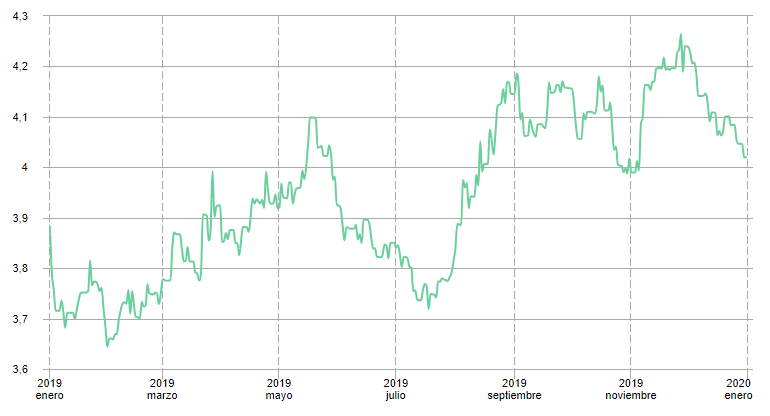

Teniendo en cuenta que son presupuestos con monedas distintas es pertinente "dolarizar" el dataset.

Este gráfico muestra datos históricos del tipo de cambio USD/BRL con respecto a 2019. El cambio USD/BRL promedio de 2019 es de 3,9432 reales brasileños por dólar estadounidense, y teniendo en cuenta que el presupuesto es actualizado y modificado a lo largo de todo el año, sería una buena opción dolarizarlo al valor promedio del dólar de ese año.

In [432]:
# Dividir las columnas por el factor 3.9432
data['ORÇAMENTO INICIAL (R$)'] = data['ORÇAMENTO INICIAL (R$)'] / 3.9432
data['ORÇAMENTO ATUALIZADO (R$)'] = data['ORÇAMENTO ATUALIZADO (R$)'] / 3.9432
data['ORÇAMENTO REALIZADO (R$)'] = data['ORÇAMENTO REALIZADO (R$)'] / 3.9432


In [433]:
missing_data = data.isnull()
missing_data.head(5)

,EXERCÍCIO,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO SUBORDINADO,NOME ÓRGÃO SUBORDINADO,CÓDIGO UNIDADE ORÇAMENTÁRIA,NOME UNIDADE ORÇAMENTÁRIA,CÓDIGO FUNÇÃO,NOME FUNÇÃO,CÓDIGO SUBFUNÇÃO,...,NOME AÇÃO,CÓDIGO CATEGORIA ECONÔMICA,NOME CATEGORIA ECONÔMICA,CÓDIGO GRUPO DE DESPESA,NOME GRUPO DE DESPESA,CÓDIGO ELEMENTO DE DESPESA,NOME ELEMENTO DE DESPESA,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO REALIZADO (R$)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [434]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

EXERCÍCIO
EXERCÍCIO
False    25328
Name: count, dtype: int64

CÓDIGO ÓRGÃO SUPERIOR
CÓDIGO ÓRGÃO SUPERIOR
False    25328
Name: count, dtype: int64

NOME ÓRGÃO SUPERIOR
NOME ÓRGÃO SUPERIOR
False    25328
Name: count, dtype: int64

CÓDIGO ÓRGÃO SUBORDINADO
CÓDIGO ÓRGÃO SUBORDINADO
False    25328
Name: count, dtype: int64

NOME ÓRGÃO SUBORDINADO
NOME ÓRGÃO SUBORDINADO
False    25328
Name: count, dtype: int64

CÓDIGO UNIDADE ORÇAMENTÁRIA
CÓDIGO UNIDADE ORÇAMENTÁRIA
False    25328
Name: count, dtype: int64

NOME UNIDADE ORÇAMENTÁRIA
NOME UNIDADE ORÇAMENTÁRIA
False    25328
Name: count, dtype: int64

CÓDIGO FUNÇÃO
CÓDIGO FUNÇÃO
False    25328
Name: count, dtype: int64

NOME FUNÇÃO
NOME FUNÇÃO
False    25328
Name: count, dtype: int64

CÓDIGO SUBFUNÇÃO
CÓDIGO SUBFUNÇÃO
False    25328
Name: count, dtype: int64

NOME SUBFUNÇÃO
NOME SUBFUNÇÃO
False    25328
Name: count, dtype: int64

CÓDIGO PROGRAMA ORÇAMENTÁRIO
CÓDIGO PROGRAMA ORÇAMENTÁRIO
False    25328
Name: count, dtype: int64

NOME PROGRAMA 

# **Exploratory Data Analysis (EDA) y visualización de datos.**

En el siguiente apartado, se analizarán los desvíos presupuestarios y las variables propias de la asignación presupuestaria:

* programacion_inicial_DA
* programacion_inicial_ajustada
* programacion_anual_vig_trim(n)
* programacion_trim(n)
* programacion_acumulada_trim(n)

In [435]:
ejfistr1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1874 entries, 1 to 2327
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ejercicio_presupuestario       1874 non-null   int64  
 1   trimestre                      1874 non-null   int64  
 2   finalidad_id                   1874 non-null   int32  
 3   finalidad_desc                 1874 non-null   object 
 4   funcion_id                     1874 non-null   int32  
 5   funcion_desc                   1874 non-null   object 
 6   jurisdiccion_id                1874 non-null   int32  
 7   jurisdiccion_desc              1874 non-null   object 
 8   subjurisdiccion_id             1874 non-null   int32  
 9   subjurisdiccion_desc           1874 non-null   object 
 10  servicio_id                    1874 non-null   int32  
 11  servicio_desc                  1874 non-null   object 
 12  programa_id                    1874 non-null   int32 

In [436]:
ejfistr2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1892 entries, 1 to 2334
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ejercicio_presupuestario       1892 non-null   int64  
 1   trimestre                      1892 non-null   int64  
 2   finalidad_id                   1892 non-null   int32  
 3   finalidad_desc                 1892 non-null   object 
 4   funcion_id                     1892 non-null   int32  
 5   funcion_desc                   1892 non-null   object 
 6   jurisdiccion_id                1892 non-null   int32  
 7   jurisdiccion_desc              1892 non-null   object 
 8   subjurisdiccion_id             1892 non-null   int32  
 9   subjurisdiccion_desc           1892 non-null   object 
 10  servicio_id                    1892 non-null   int32  
 11  servicio_desc                  1892 non-null   object 
 12  programa_id                    1892 non-null   int32 

In [437]:
ejfistr3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1604 entries, 1 to 2356
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ejercicio_presupuestario       1604 non-null   int64  
 1   trimestre                      1604 non-null   int64  
 2   finalidad_id                   1604 non-null   int32  
 3   finalidad_desc                 1604 non-null   object 
 4   funcion_id                     1604 non-null   int32  
 5   funcion_desc                   1604 non-null   object 
 6   jurisdiccion_id                1604 non-null   int32  
 7   jurisdiccion_desc              1604 non-null   object 
 8   subjurisdiccion_id             1604 non-null   int32  
 9   subjurisdiccion_desc           1604 non-null   object 
 10  servicio_id                    1604 non-null   int32  
 11  servicio_desc                  1604 non-null   object 
 12  programa_id                    1604 non-null   int32 

**Selección de features para el modelado.**

1. **programacion_inicial_DA:** La programación inicial en Decisión Administrativa (DA) representa el presupuesto planificado inicialmente asignado para un determinado período, como un año fiscal. Este presupuesto se basa en las decisiones administrativas tomadas al principio del período de planificación.

2. **programacion_inicial_ajustada:** Esta variable refleja la programación inicial que ha sido ajustada o modificada debido a cambios en las circunstancias o en las políticas gubernamentales. Puede surgir como resultado de nuevas decisiones administrativas, cambios en las condiciones económicas o revisiones presupuestarias.

3. **programacion_anual_vig_trim1:** La programación anual vigente en el primer trimestre representa la cantidad presupuestada para todo el año fiscal que permanece vigente y sin cambios hasta el final del primer trimestre. Es importante para evaluar cómo se está ejecutando el presupuesto en comparación con la planificación inicial.

4. **programacion_trim1:** La programación del trimestre 1 indica la cantidad específica presupuestada para el primer trimestre del año fiscal. Esta variable es crucial para monitorear y comparar el rendimiento presupuestario en intervalos de tiempo más cortos y ajustar las estrategias de gasto según sea necesario.

5. **programacion_acumulada_trim1:** La programación acumulada al trimestre 1 es la suma total del presupuesto asignado y/o ejecutado hasta el final del primer trimestre. Esta variable proporciona una visión integral del rendimiento presupuestario hasta el momento y sirve como base para proyecciones futuras y decisiones de corrección presupuestaria.

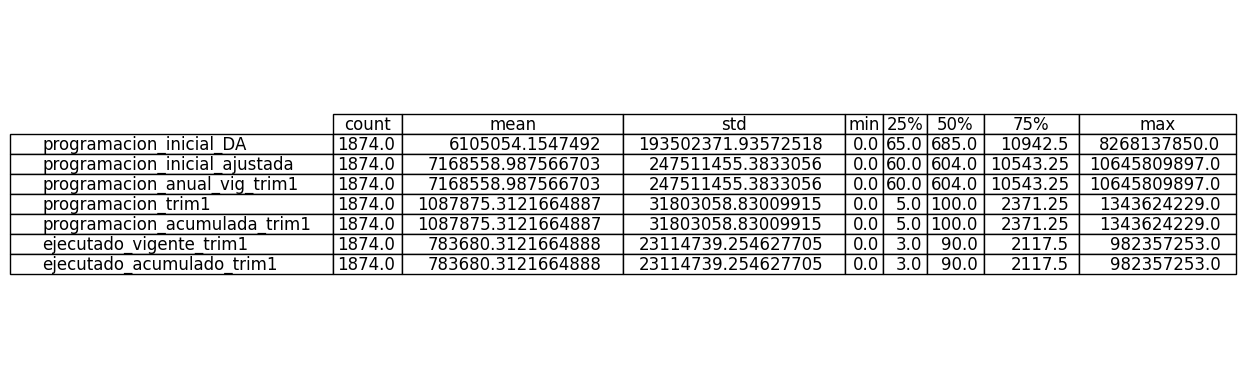

In [438]:
columnas_float = ejfistr1.select_dtypes(include=['float64']).columns

# Describir las columnas de tipo float64
summary = ejfistr1[columnas_float].describe().T

# Crear tabla en el formato que desees
tabla = plt.table(cellText=summary.values,
                  colLabels=summary.columns,
                  rowLabels=summary.index,
                  loc='center')

# Ajustar el tamaño de la celda para que los valores se muestren correctamente
tabla.auto_set_column_width(col=list(range(len(summary.columns))))

# Estilo de la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1.2, 1.2)

# Ocultar ejes
plt.axis('off')

# Guardar como imagen PNG ajustando automáticamente el área de la figura al contenido
plt.savefig('describe.png', transparent=True, bbox_inches='tight', dpi=300)

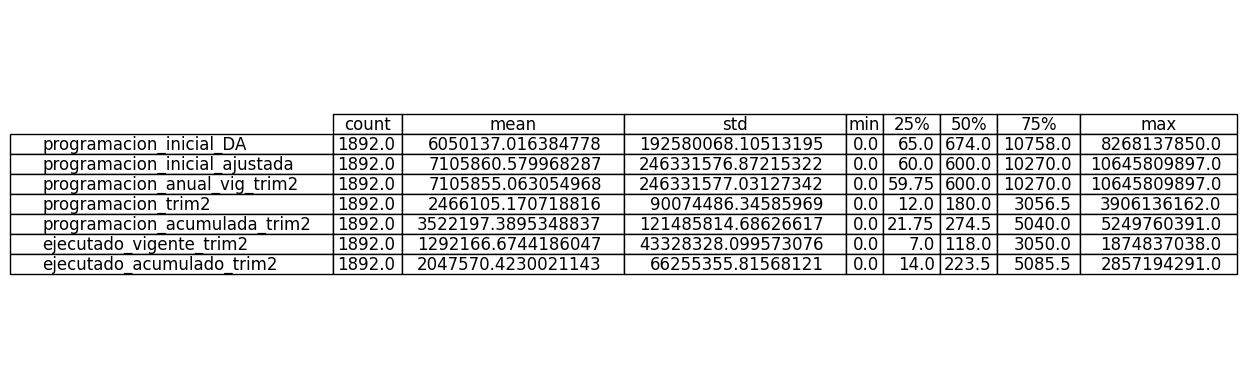

In [439]:
columnas_float = ejfistr2.select_dtypes(include=['float64']).columns

# Describir las columnas de tipo float64
summary2 = ejfistr2[columnas_float].describe().T

# Crear tabla en el formato que desees
tabla2 = plt.table(cellText=summary2.values,
                  colLabels=summary2.columns,
                  rowLabels=summary2.index,
                  loc='center')

# Ajustar el tamaño de la celda para que los valores se muestren correctamente
tabla2.auto_set_column_width(col=list(range(len(summary2.columns))))

# Estilo de la tabla
tabla2.auto_set_font_size(False)
tabla2.set_fontsize(12)
tabla2.scale(1.2, 1.2)

# Ocultar ejes
plt.axis('off')

# Guardar como imagen PNG ajustando automáticamente el área de la figura al contenido
plt.savefig('describe2.png', transparent=True, bbox_inches='tight', dpi=300)

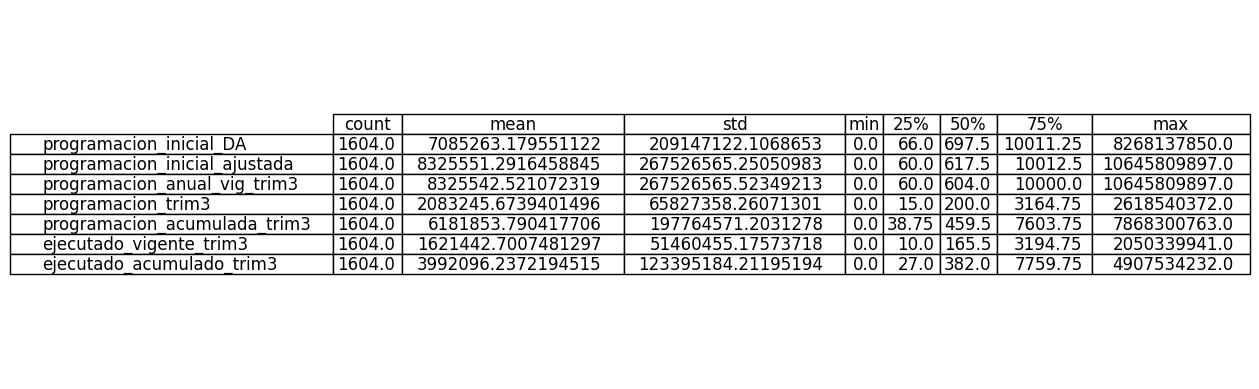

In [440]:
columnas_float = ejfistr3.select_dtypes(include=['float64']).columns

# Describir las columnas de tipo float64
summary3 = ejfistr3[columnas_float].describe().T

# Crear tabla en el formato que desees
tabla3 = plt.table(cellText=summary3.values,
                  colLabels=summary3.columns,
                  rowLabels=summary3.index,
                  loc='center')

# Ajustar el tamaño de la celda para que los valores se muestren correctamente
tabla3.auto_set_column_width(col=list(range(len(summary3.columns))))

# Estilo de la tabla
tabla3.auto_set_font_size(False)
tabla3.set_fontsize(12)
tabla3.scale(1.2, 1.2)

# Ocultar ejes
plt.axis('off')

# Guardar como imagen PNG ajustando automáticamente el área de la figura al contenido
plt.savefig('describe3.png', transparent=True, bbox_inches='tight', dpi=300)

C:\Users\mjhfernandez\AppData\Local\Temp\ipykernel_11588\2667807327.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary = summary.applymap(lambda x: f'{x:.2f}')


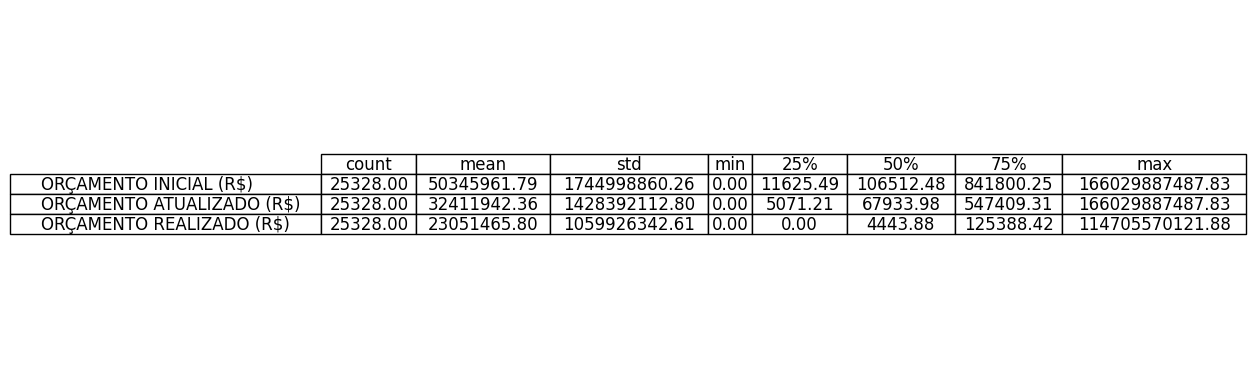

In [441]:
# Selecciona las columnas específicas que quieres describir
columnas_interes = [
    'ORÇAMENTO INICIAL (R$)',
    'ORÇAMENTO ATUALIZADO (R$)',
    'ORÇAMENTO REALIZADO (R$)'
]

# Realiza el describe sobre las columnas de interés
summary = data[columnas_interes].describe().T

# Redondea los valores a dos decimales
summary = summary.applymap(lambda x: f'{x:.2f}')

# Crear tabla en el formato que desees
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
tabla = ax.table(cellText=summary.values,
                 colLabels=summary.columns,
                 rowLabels=summary.index,
                 cellLoc='center',
                 loc='center')

# Ajustar el tamaño de la celda para que los valores se muestren correctamente
tabla.auto_set_column_width(col=list(range(len(summary.columns))))

# Estilo de la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1.2, 1.2)

# Guardar como imagen PNG ajustando automáticamente el área de la figura al contenido
plt.savefig('describe4.png', transparent=True, bbox_inches='tight', dpi=300)

# Mostrar la figura (opcional)
plt.show()

# Concatenado de los tres ejercicios

Al haber tantos conjuntos de datos con parámetros y descripciones técnicamente iguales, se concatenan los tres ejercicios en pos de reducir la extensión del análisis gráfico. Además se agrega la columna de porcentaje de desvío para la realización de los gráficos.

In [442]:
ejfistr1.columns = ejfistr1.columns.str.replace('_trim1', '')
ejfistr2.columns = ejfistr2.columns.str.replace('_trim2', '')
ejfistr3.columns = ejfistr3.columns.str.replace('_trim3', '')

# Concatenar los DataFrames
dfcombinado = pd.concat([ejfistr1, ejfistr2, ejfistr3], ignore_index=True)

In [443]:
dfcombinado['programacion'].eq(0).sum()

575

In [444]:
# Calcular el porcentaje de diferencia
dfcombinado['porcentaje_diferencia'] = ((dfcombinado['programacion'] - dfcombinado['ejecutado_vigente']) / dfcombinado['programacion']) * 100
# Reemplazar NaN con 0
dfcombinado['porcentaje_diferencia'] = dfcombinado['porcentaje_diferencia'].fillna(0)
dfcombinado

,ejercicio_presupuestario,trimestre,finalidad_id,finalidad_desc,funcion_id,funcion_desc,jurisdiccion_id,jurisdiccion_desc,subjurisdiccion_id,subjurisdiccion_desc,...,programacion,programacion_acumulada,ejecutado_vigente,ejecutado_acumulado,porc_desvio_acum,causa_desvio,causa_desvio_detalle,causa_desvio_comentario,ultima_actualizacion_fecha,porcentaje_diferencia
0,2023,1,1,ADMINISTRACION GUBERNAMENTAL,1,Legislativa,1,Poder Legislativo Nacional,0,Poder Legislativo Nacional,...,15000000.0,15000000.0,2533784.0,2533784.0,"-83,11",Atraso Corregible,Atraso Corregible,En este primer trimestre/2023 se realizaron im...,Última actualización del ejercicio 2023: 07 No...,83.108107
1,2023,1,1,ADMINISTRACION GUBERNAMENTAL,1,Legislativa,1,Poder Legislativo Nacional,0,Poder Legislativo Nacional,...,60000.0,60000.0,61428.0,61428.0,"2,38",Otras Causas,Otras Causas,Incremento debido a los reclamos por cortes en...,Última actualización del ejercicio 2023: 07 No...,-2.380000
2,2023,1,1,ADMINISTRACION GUBERNAMENTAL,1,Legislativa,1,Poder Legislativo Nacional,0,Poder Legislativo Nacional,...,54.0,54.0,44.0,44.0,"-18,52",Otras Causas,Otras Causas,No se iniciaron más actuaciones por estar aboc...,Última actualización del ejercicio 2023: 07 No...,18.518519
3,2023,1,1,ADMINISTRACION GUBERNAMENTAL,1,Legislativa,1,Poder Legislativo Nacional,0,Poder Legislativo Nacional,...,3000.0,3000.0,3222.0,3222.0,"7,40",Otras Causas,Otras Causas,Incremento debido a los reclamos por cortes en...,Última actualización del ejercicio 2023: 07 No...,-7.400000
4,2023,1,1,ADMINISTRACION GUBERNAMENTAL,1,Legislativa,1,Poder Legislativo Nacional,0,Poder Legislativo Nacional,...,24.0,24.0,24.0,24.0,"0,00",-,-,-,Última actualización del ejercicio 2023: 07 No...,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5365,2023,3,4,SERVICIOS ECONOMICOS,8,Seguros y Finanzas,50,Ministerio de Economía,0,Ministerio de Economía,...,10.0,26.0,14.0,30.0,"15,38",La Mejora es Temporal,La Mejora es Temporal,El desvió se debe al adelantamiento de inspec...,Última actualización del ejercicio 2023: 07 No...,-40.000000
5366,2023,3,4,SERVICIOS ECONOMICOS,8,Seguros y Finanzas,50,Ministerio de Economía,0,Ministerio de Economía,...,22.0,83.0,29.0,75.0,"-9,64",Otras Causas,Otras Causas,El desvio negativo acumulado obedece al atraso...,Última actualización del ejercicio 2023: 07 No...,-31.818182
5367,2023,3,4,SERVICIOS ECONOMICOS,8,Seguros y Finanzas,50,Ministerio de Economía,0,Ministerio de Economía,...,126.0,381.0,2361.0,3938.0,"933,60",Otras Causas,Otras Causas,Desvíos afectados por el incidente Informático...,Última actualización del ejercicio 2023: 07 No...,-1773.809524
5368,2023,3,4,SERVICIOS ECONOMICOS,8,Seguros y Finanzas,50,Ministerio de Economía,0,Ministerio de Economía,...,12.0,36.0,26.0,47.0,"30,56",Otras Causas,Otras Causas,Se han realizado 26 nuevas verificaciones que ...,Última actualización del ejercicio 2023: 07 No...,-116.666667


In [445]:
nan_count = dfcombinado['porcentaje_diferencia'].isna().sum()
print("Cantidad de NaN en la columna 'porcentaje_diferencia':", nan_count)


Cantidad de NaN en la columna 'porcentaje_diferencia': 0


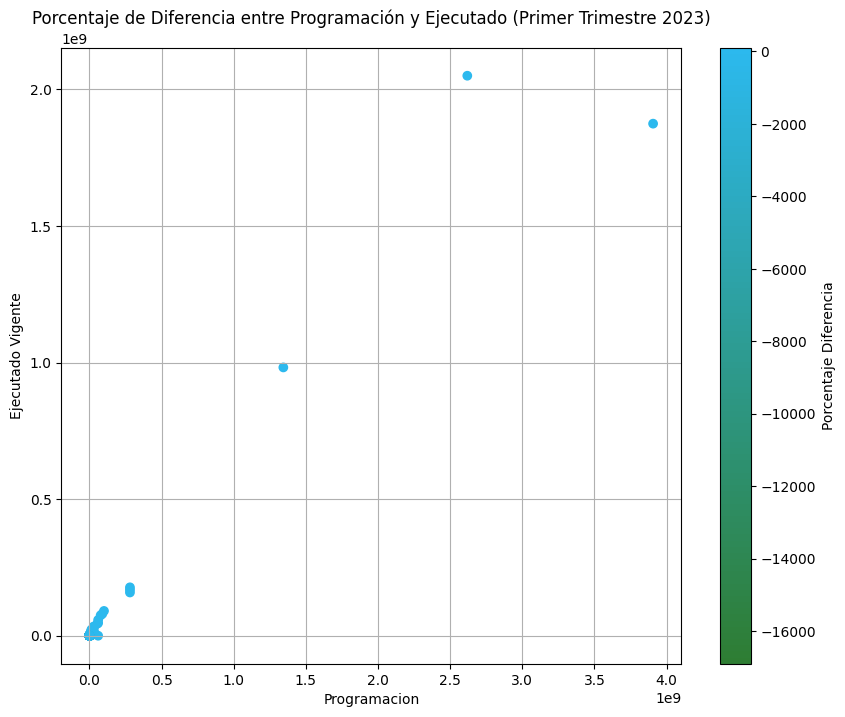

In [446]:
scatter(dfcombinado, 'programacion', 'ejecutado_vigente', 'porcentaje_diferencia', 'scatter.png')


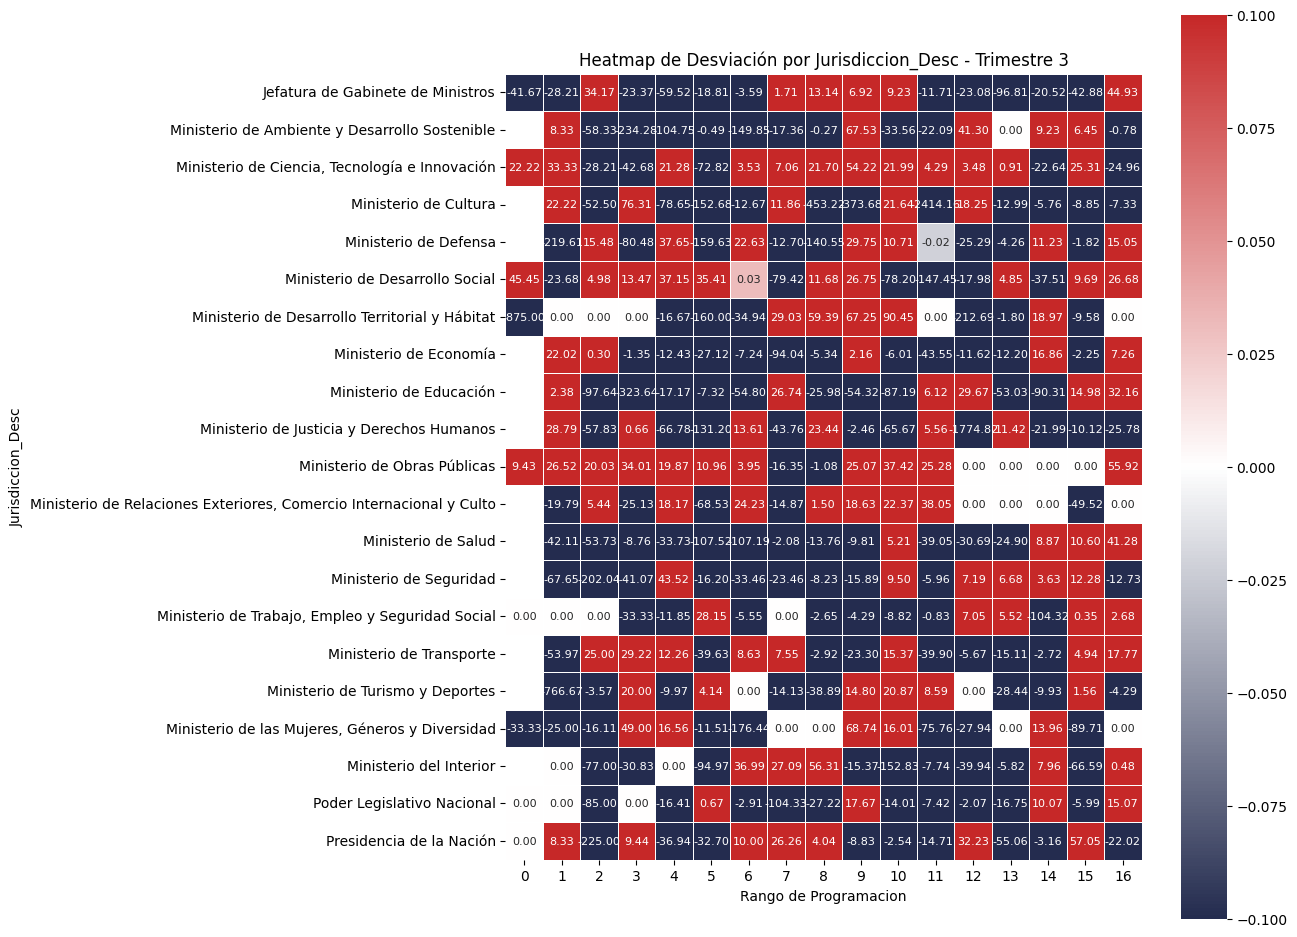

In [447]:
heatmap(dfcombinado, 'porcentaje_diferencia', 'programacion', 'jurisdiccion_desc', 'output_heatmap.png')


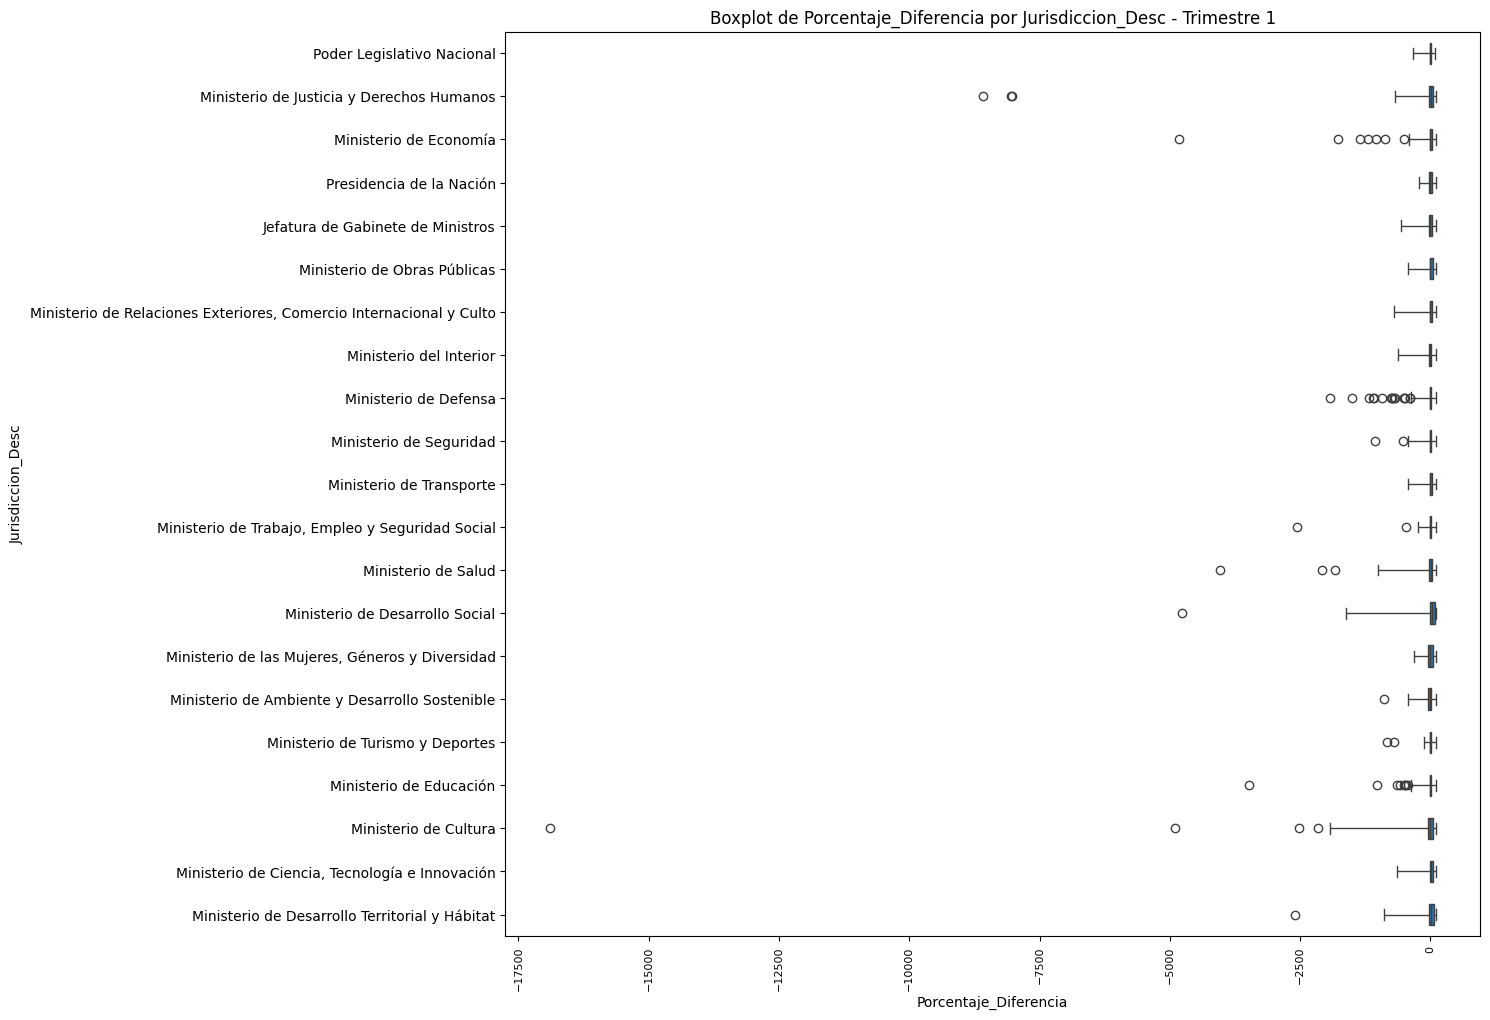

In [448]:
horizontal_boxplot(dfcombinado, 'porcentaje_diferencia', 'jurisdiccion_desc', 'hobxplot.png')

C:\Users\mjhfernandez\AppData\Local\Temp\ipykernel_11588\1362523294.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.annotate(f'{word}%', xy=(i, tab_pareto['pareto_porcentaje'][i]), ha="center", va="bottom")


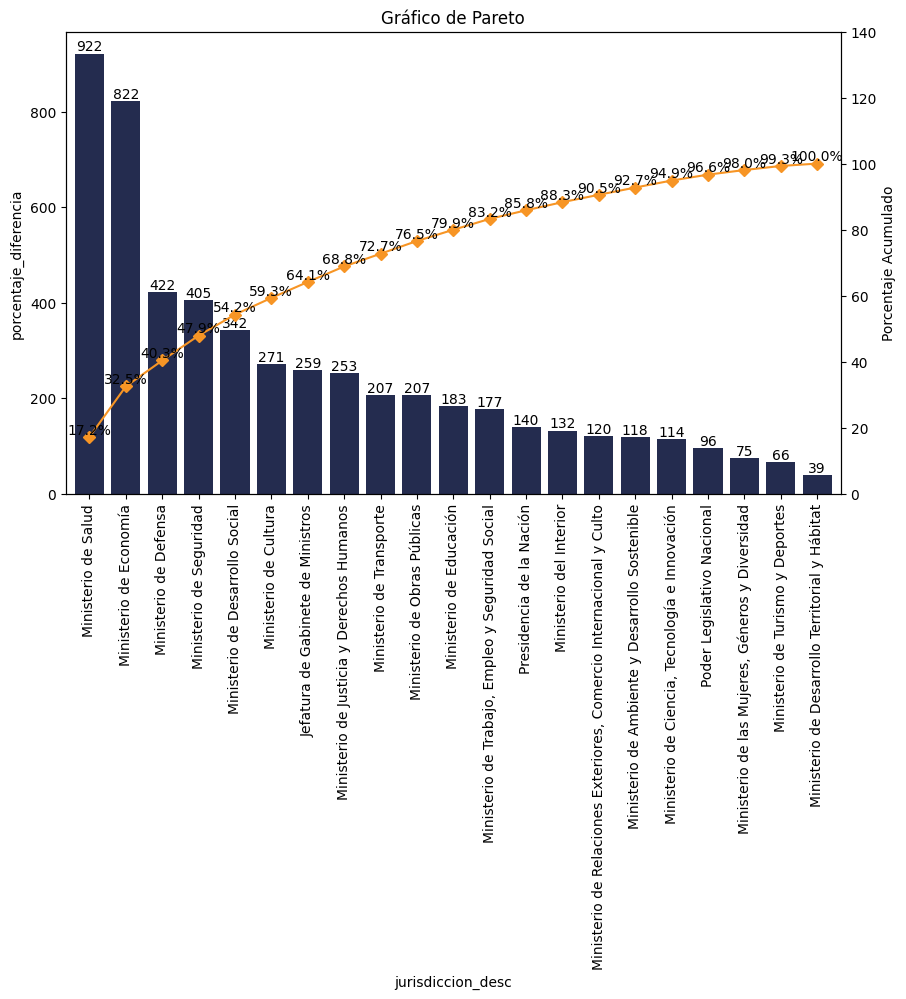

In [449]:
pareto(dfcombinado, 'jurisdiccion_desc', 'porcentaje_diferencia', 'pareto.png')  # Creación Gráfico de Pareto

# Visualización de datos presupuesto de Brasil

En pos de la visualizazción de la distribución de porcentajes se crea la columna de ```Desvio_Presupuestario_%```

In [450]:
# Calcular el porcentaje de desvío presupuestario
data['Desvio_Presupuestario_%'] = ((data['ORÇAMENTO REALIZADO (R$)'] - data['ORÇAMENTO ATUALIZADO (R$)']) / data['ORÇAMENTO ATUALIZADO (R$)']) * 100

In [451]:
data

,EXERCÍCIO,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO SUBORDINADO,NOME ÓRGÃO SUBORDINADO,CÓDIGO UNIDADE ORÇAMENTÁRIA,NOME UNIDADE ORÇAMENTÁRIA,CÓDIGO FUNÇÃO,NOME FUNÇÃO,CÓDIGO SUBFUNÇÃO,...,CÓDIGO CATEGORIA ECONÔMICA,NOME CATEGORIA ECONÔMICA,CÓDIGO GRUPO DE DESPESA,NOME GRUPO DE DESPESA,CÓDIGO ELEMENTO DE DESPESA,NOME ELEMENTO DE DESPESA,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO REALIZADO (R$),Desvio_Presupuestario_%
0,2019,3000,Tribunal de Contas da União,3000,Tribunal de Contas da União - Unidades com vín...,3101,TRIBUNAL DE CONTAS DA UNIAO,1,Legislativa,32,...,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,39,Outros Serviços de Terceiros - Pessoa Jurídica,0.000000e+00,0.000000e+00,137157.351897,inf
1,2019,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,20204,INST.NAC.DE TECNOLOGIA DA INFORMACAO-ITI,4,Administração,125,...,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,39,Outros Serviços de Terceiros - Pessoa Jurídica,1.004765e+06,1.004765e+06,774202.845405,-22.946865
2,2019,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,20204,INST.NAC.DE TECNOLOGIA DA INFORMACAO-ITI,4,Administração,125,...,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,47,Obrigações Tributárias e Contributivas,1.479839e+04,1.479839e+04,14390.604078,-2.755641
3,2019,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,20204,INST.NAC.DE TECNOLOGIA DA INFORMACAO-ITI,4,Administração,125,...,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,18,Auxílio Financeiro a Estudantes,7.346487e+04,7.346487e+04,57793.112193,-21.332311
4,2019,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,20204,INST.NAC.DE TECNOLOGIA DA INFORMACAO-ITI,4,Administração,125,...,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,33,Passagens e Despesas com Locomoção,6.731503e+04,6.731503e+04,61902.137858,-8.041132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25323,2019,81000,"Ministério da Mulher, Família e Direitos Humanos",81000,"Ministério da Mulher, Família e Direitos Human...",81101,MINISTERIO DOS DIREITOS HUMANOS - MDH,14,Direitos da cidadania,122,...,4,DESPESAS DE CAPITAL,4,Investimentos,52,Equipamentos e Material Permanente,5.122743e+04,5.122743e+04,0.000000,-100.000000
25324,2019,81000,"Ministério da Mulher, Família e Direitos Humanos",81000,"Ministério da Mulher, Família e Direitos Human...",81101,MINISTERIO DOS DIREITOS HUMANOS - MDH,14,Direitos da cidadania,122,...,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,0,Não informado,2.648561e+06,0.000000e+00,0.000000,NaN
25325,2019,81000,"Ministério da Mulher, Família e Direitos Humanos",81000,"Ministério da Mulher, Família e Direitos Human...",81101,MINISTERIO DOS DIREITOS HUMANOS - MDH,14,Direitos da cidadania,122,...,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,35,Serviços de Consultoria,4.087719e+04,4.087719e+04,40877.188578,0.000000
25326,2019,81000,"Ministério da Mulher, Família e Direitos Humanos",81000,"Ministério da Mulher, Família e Direitos Human...",81101,MINISTERIO DOS DIREITOS HUMANOS - MDH,14,Direitos da cidadania,122,...,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,30,Material de Consumo,6.991257e+04,6.991257e+04,27138.572733,-61.182129


C:\Users\mjhfernandez\AppData\Local\Temp\ipykernel_11588\2347590497.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x=x_col, y=y_col, data=df, width=0.5, whis=20, palette=['#242C4F'])
C:\Users\mjhfernandez\AppData\Local\Temp\ipykernel_11588\2347590497.py:6: UserWarning: 
The palette list has fewer values (1) than needed (20) and will cycle, which may produce an uninterpretable plot.
  boxplot = sns.boxplot(x=x_col, y=y_col, data=df, width=0.5, whis=20, palette=['#242C4F'])


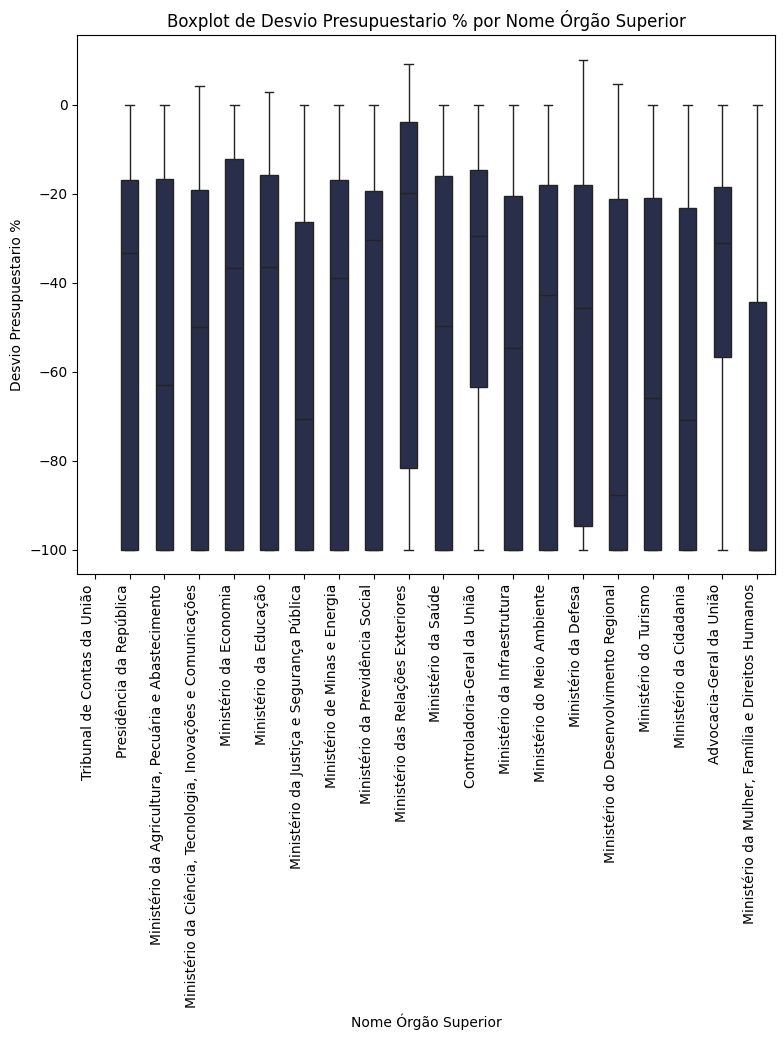

In [452]:
# Ejemplo de uso:
vertical_boxplot(data, 'NOME ÓRGÃO SUPERIOR', 'Desvio_Presupuestario_%', 'boxplot_brasil.png')

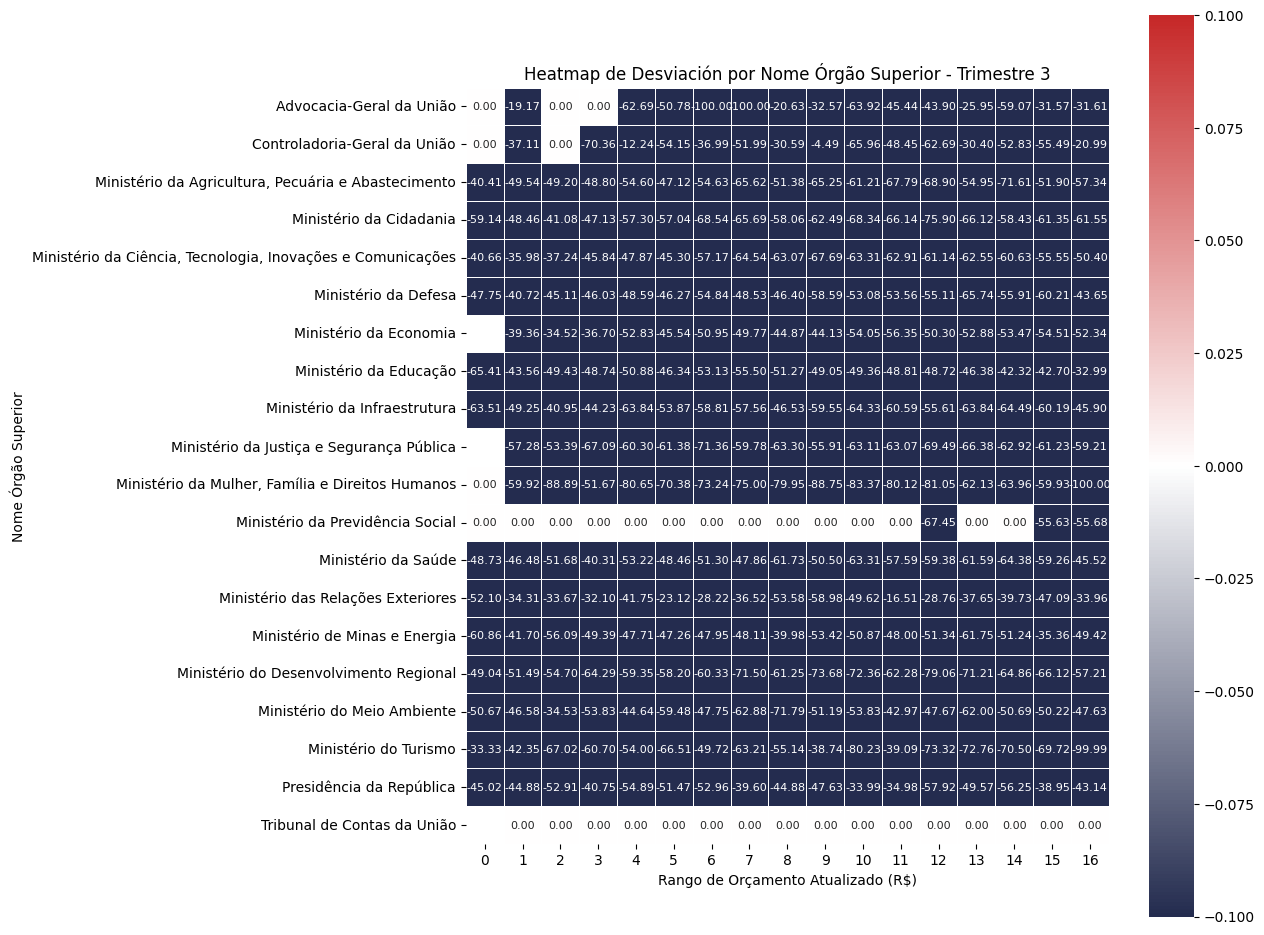

In [453]:
heatmap(data, 'Desvio_Presupuestario_%', 'ORÇAMENTO ATUALIZADO (R$)', 'NOME ÓRGÃO SUPERIOR', 'heatmap_brazil.png')

C:\Users\mjhfernandez\AppData\Local\Temp\ipykernel_11588\1362523294.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.annotate(f'{word}%', xy=(i, tab_pareto['pareto_porcentaje'][i]), ha="center", va="bottom")


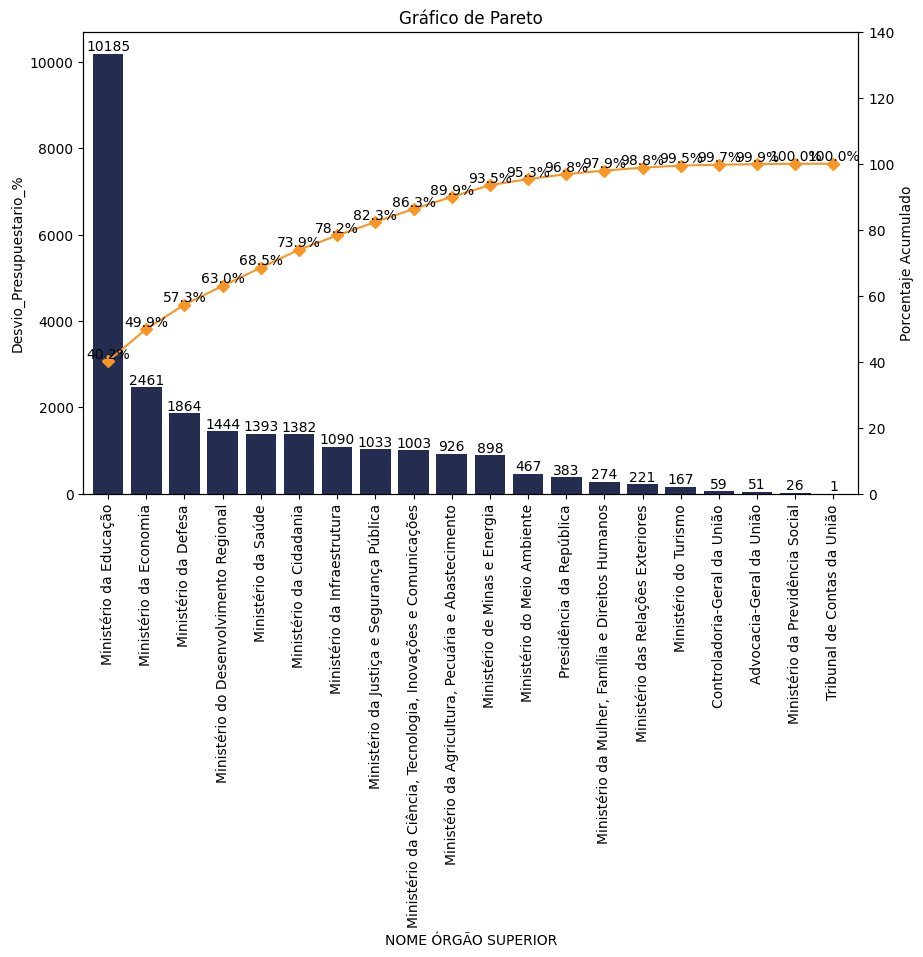

In [454]:
pareto(data,'NOME ÓRGÃO SUPERIOR','Desvio_Presupuestario_%','pareto_brasil.png') #Creación de gráfico de Pareto para trimestre 3

# Conclusiones luego del análisis gráfico:

Después de analizar detenidamente los datos trimestrales de desviación presupuestaria, se han obtenido varias conclusiones importantes.

**Trimestre 1:**
- **Comparación de Porcentaje de Desvío presupuestario y su acumulado:**
   - No se observan discrepancias significativas entre la ejecución total y su acumulado, lo que indica una coincidencia temprana entre ambos.
- **Scatterplot pendiente de relación entre lo presupuestado y pagado:**
   - Se evidencia una fuerte correlación entre lo presupuestado y pagado, con una pendiente cercana a 1.
- **Heatmap distribución de desvío presupuestario por jurisdicciones:**
   - No se identifica un patrón claro en la distribución de desviación presupuestaria por jurisdicciones, aunque se reconoce la importancia de esta información en el análisis.
- **Boxplot de desvío presupuestario por jurisdicciones:**
   - Se visualiza el umbral de valores atípicos, especialmente por debajo de -900% de desvío presupuestario, con acumulaciones notables en varias jurisdicciones.
- **Gráfico de pareto de desvío presupuestario por jurisdicciones:**
   - Ratifica la acumulación de valores atípicos en jurisdicciones específicas, destacando la poca fluctuación presupuestaria en el resto.

**Trimestre 2:**
- **Comparación de Porcentaje de Desvío presupuestario y su acumulado:**
   - Se empieza a evidenciar la tendencia de desvío acumulado y un aumento en la frecuencia de desvíos.
- **Scatterplot pendiente de relación entre lo presupuestado y pagado:**
   - La pendiente muestra una relación más pronunciada cercana a 1, indicando una mayor correlación, pero también posibles valores atípicos.
- **Heatmap distribución de desvío presupuestario por jurisdicciones:**
   - No se observa una tendencia clara en la distribución, aunque se confirma una relación directa entre la desviación y el presupuesto.
- **Boxplot de desvío presupuestario por jurisdicciones:**
   - Se identifica nuevamente el umbral de valores atípicos y acumulaciones en jurisdicciones específicas.
- **Gráfico de pareto de desvío presupuestario por jurisdicciones:**
   - Confirma las acumulaciones de valores atípicos en las mismas jurisdicciones, indicando una consistencia en las desviaciones presupuestarias.

**Trimestre 3:**
- **Comparación de Porcentaje de Desvío presupuestario y su acumulado:**
   - Se consolida la tendencia de desvío acumulado y se observa un aumento continuo en la frecuencia de desviaciones.
- **Scatterplot pendiente de relación entre lo presupuestado y pagado:**
   - La pendiente se hace aún más pronunciada, indicando una mayor disparidad entre lo presupuestado y lo pagado.
- **Heatmap distribución de desvío presupuestario por jurisdicciones:**
   - La relación directa entre la desviación y el presupuesto se mantiene, aunque no se observa una tendencia específica.
- **Boxplot de desvío presupuestario por jurisdicciones:**
   - Persisten los valores atípicos y acumulaciones en las mismas jurisdicciones, indicando una consistencia en los patrones de desviación.
- **Gráfico de pareto de desvío presupuestario por jurisdicciones:**
   - Confirma la concentración de desviaciones en las mismas jurisdicciones, resaltando la importancia de estas áreas en el análisis presupuestario.

En conjunto, estos hallazgos resaltan la necesidad de una supervisión continua y ajustes estratégicos en la gestión presupuestaria para mejorar la asignación de recursos en la administración pública.

- **Presupuesto Nacional Brasileño**

Luego de importados los datos y hecho un sencillo EDA, podemos apreciar una distribución mucho más normalizada en cuanto al presupuesto y correcciones a diferencia del presupuesto argentino, lo cual nos sirve para poder ampliar nuestro modelo y mejorar su funcionamiento.

# Tratamiento de Outliers

Luego de la visualización de los boxplot de cada trimestre, separadas por jurisdicción, se sugiere el tratamiento de outliers allí representados, y un posterior análisis de un nuevo dataset limpio.

In [455]:
df_new = dfcombinado[dfcombinado['porcentaje_diferencia'] >= -150]

In [456]:
df_new

,ejercicio_presupuestario,trimestre,finalidad_id,finalidad_desc,funcion_id,funcion_desc,jurisdiccion_id,jurisdiccion_desc,subjurisdiccion_id,subjurisdiccion_desc,...,programacion_acumulada,ejecutado_vigente,ejecutado_acumulado,porc_desvio_acum,causa_desvio,causa_desvio_detalle,causa_desvio_comentario,ultima_actualizacion_fecha,porcentaje_diferencia,programacion_bin
0,2023,1,1,ADMINISTRACION GUBERNAMENTAL,1,Legislativa,1,Poder Legislativo Nacional,0,Poder Legislativo Nacional,...,15000000.0,2533784.0,2533784.0,"-83,11",Atraso Corregible,Atraso Corregible,En este primer trimestre/2023 se realizaron im...,Última actualización del ejercicio 2023: 07 No...,83.108107,16
1,2023,1,1,ADMINISTRACION GUBERNAMENTAL,1,Legislativa,1,Poder Legislativo Nacional,0,Poder Legislativo Nacional,...,60000.0,61428.0,61428.0,"2,38",Otras Causas,Otras Causas,Incremento debido a los reclamos por cortes en...,Última actualización del ejercicio 2023: 07 No...,-2.380000,15
2,2023,1,1,ADMINISTRACION GUBERNAMENTAL,1,Legislativa,1,Poder Legislativo Nacional,0,Poder Legislativo Nacional,...,54.0,44.0,44.0,"-18,52",Otras Causas,Otras Causas,No se iniciaron más actuaciones por estar aboc...,Última actualización del ejercicio 2023: 07 No...,18.518519,6
3,2023,1,1,ADMINISTRACION GUBERNAMENTAL,1,Legislativa,1,Poder Legislativo Nacional,0,Poder Legislativo Nacional,...,3000.0,3222.0,3222.0,"7,40",Otras Causas,Otras Causas,Incremento debido a los reclamos por cortes en...,Última actualización del ejercicio 2023: 07 No...,-7.400000,12
4,2023,1,1,ADMINISTRACION GUBERNAMENTAL,1,Legislativa,1,Poder Legislativo Nacional,0,Poder Legislativo Nacional,...,24.0,24.0,24.0,"0,00",-,-,-,Última actualización del ejercicio 2023: 07 No...,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,2023,3,4,SERVICIOS ECONOMICOS,8,Seguros y Finanzas,50,Ministerio de Economía,0,Ministerio de Economía,...,68.0,23.0,64.0,"-5,88",Atraso Corregible,Atraso Corregible,Las Asistencias a Reunion e Inspecciones está ...,Última actualización del ejercicio 2023: 07 No...,4.166667,4
5365,2023,3,4,SERVICIOS ECONOMICOS,8,Seguros y Finanzas,50,Ministerio de Economía,0,Ministerio de Economía,...,26.0,14.0,30.0,"15,38",La Mejora es Temporal,La Mejora es Temporal,El desvió se debe al adelantamiento de inspec...,Última actualización del ejercicio 2023: 07 No...,-40.000000,3
5366,2023,3,4,SERVICIOS ECONOMICOS,8,Seguros y Finanzas,50,Ministerio de Economía,0,Ministerio de Economía,...,83.0,29.0,75.0,"-9,64",Otras Causas,Otras Causas,El desvio negativo acumulado obedece al atraso...,Última actualización del ejercicio 2023: 07 No...,-31.818182,4
5368,2023,3,4,SERVICIOS ECONOMICOS,8,Seguros y Finanzas,50,Ministerio de Economía,0,Ministerio de Economía,...,36.0,26.0,47.0,"30,56",Otras Causas,Otras Causas,Se han realizado 26 nuevas verificaciones que ...,Última actualización del ejercicio 2023: 07 No...,-116.666667,3


In [457]:
df_new['porcentaje_diferencia'].nunique()

2750

In [458]:
# Calcular el rango intercuartílico (IQR)

Q1 = df_new['porcentaje_diferencia'].quantile(0.25)

Q3 = df_new['porcentaje_diferencia'].quantile(0.75)

IQR = Q3 - Q1

# Definir los límites para identificar outliers

limite_inferior = Q1 - 1.5 * IQR

limite_superior = Q3 + 1.5 * IQR

# Contar outliers

outliers1 = df_new[(df_new['porcentaje_diferencia'] < limite_inferior) | (df_new['porcentaje_diferencia'] > limite_superior)]

porcentaje_outliers1 = len(outliers1) / len(df_new) * 100

print("Porcentaje de outliers para el trimestre 1:", porcentaje_outliers1)

Porcentaje de outliers para el trimestre 1: 14.494202319072372


In [459]:
seleccion1 = ((df_new['porcentaje_diferencia'] >= limite_inferior) & (df_new['porcentaje_diferencia'] <= limite_superior))
ejfistr1_new = df_new[seleccion1]


# Nuevos BoxPlot

Luego del tratamiento de outliers, se general los nuevos boxplot con el dataset sin outliers

C:\Users\mjhfernandez\AppData\Local\Temp\ipykernel_11588\2347590497.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x=x_col, y=y_col, data=df, width=0.5, whis=20, palette=['#242C4F'])
C:\Users\mjhfernandez\AppData\Local\Temp\ipykernel_11588\2347590497.py:6: UserWarning: 
The palette list has fewer values (1) than needed (21) and will cycle, which may produce an uninterpretable plot.
  boxplot = sns.boxplot(x=x_col, y=y_col, data=df, width=0.5, whis=20, palette=['#242C4F'])


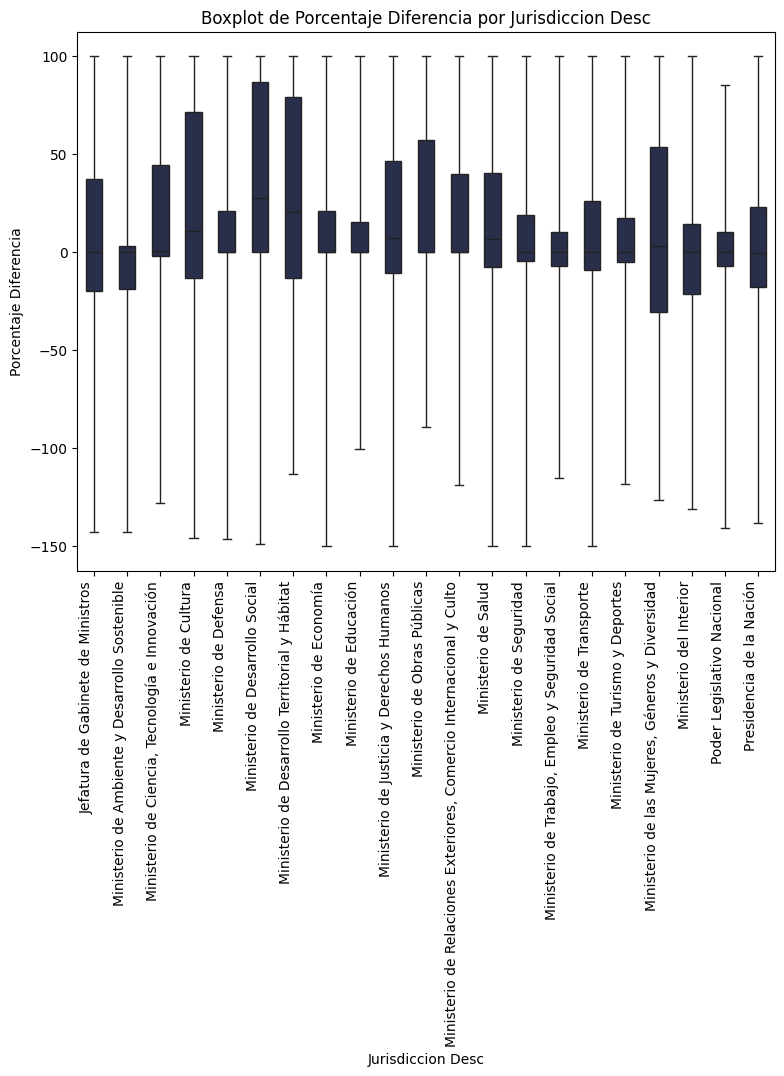

In [460]:
vertical_boxplot(df_new, 'jurisdiccion_desc', 'porcentaje_diferencia', 'boxplot_new.png')

# Dolarización de DataSet argentino

Ya que el presupuesto brasileño fue dolariado, es pertinente relizar el mismo proceso con el presupuesto argentino

Durante el periodo observado la cotización oficial del dólar comenzó con un valor de `$185,36` en la jornada del 2 de enero de 2023. En la última actualización del 29 de diciembre de 2023 cerró a `$847,11`, lo que representó una variación en el precio del 357,01%. Durante este periodo el valor promedio fue de `$309,90`.

In [461]:
# Aplicar la función a las columnas especificadas
columnas_a_dividir = ['programacion_anual_vig', 'programacion', 'programacion_acumulada',
                      'ejecutado_vigente', 'ejecutado_acumulado', 'porc_desvio_acum']

# Convertir las columnas seleccionadas a tipo numérico
df_new[columnas_a_dividir] = df_new[columnas_a_dividir].apply(pd.to_numeric, errors='coerce')

# Definir la función para dividir cada valor por 309.90
def dolarizacion(value):
    return value / 309.90

# Aplicar la función a las columnas especificadas
df_new[columnas_a_dividir] = df_new[columnas_a_dividir].applymap(dolarizacion)

C:\Users\mjhfernandez\AppData\Local\Temp\ipykernel_11588\3953301652.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_new[columnas_a_dividir] = df_new[columnas_a_dividir].applymap(dolarizacion)


In [462]:
df_new

,ejercicio_presupuestario,trimestre,finalidad_id,finalidad_desc,funcion_id,funcion_desc,jurisdiccion_id,jurisdiccion_desc,subjurisdiccion_id,subjurisdiccion_desc,...,programacion_acumulada,ejecutado_vigente,ejecutado_acumulado,porc_desvio_acum,causa_desvio,causa_desvio_detalle,causa_desvio_comentario,ultima_actualizacion_fecha,porcentaje_diferencia,programacion_bin
0,2023,1,1,ADMINISTRACION GUBERNAMENTAL,1,Legislativa,1,Poder Legislativo Nacional,0,Poder Legislativo Nacional,...,48402.710552,8176.134237,8176.134237,NaN,Atraso Corregible,Atraso Corregible,En este primer trimestre/2023 se realizaron im...,Última actualización del ejercicio 2023: 07 No...,83.108107,16
1,2023,1,1,ADMINISTRACION GUBERNAMENTAL,1,Legislativa,1,Poder Legislativo Nacional,0,Poder Legislativo Nacional,...,193.610842,198.218780,198.218780,NaN,Otras Causas,Otras Causas,Incremento debido a los reclamos por cortes en...,Última actualización del ejercicio 2023: 07 No...,-2.380000,15
2,2023,1,1,ADMINISTRACION GUBERNAMENTAL,1,Legislativa,1,Poder Legislativo Nacional,0,Poder Legislativo Nacional,...,0.174250,0.141981,0.141981,NaN,Otras Causas,Otras Causas,No se iniciaron más actuaciones por estar aboc...,Última actualización del ejercicio 2023: 07 No...,18.518519,6
3,2023,1,1,ADMINISTRACION GUBERNAMENTAL,1,Legislativa,1,Poder Legislativo Nacional,0,Poder Legislativo Nacional,...,9.680542,10.396902,10.396902,NaN,Otras Causas,Otras Causas,Incremento debido a los reclamos por cortes en...,Última actualización del ejercicio 2023: 07 No...,-7.400000,12
4,2023,1,1,ADMINISTRACION GUBERNAMENTAL,1,Legislativa,1,Poder Legislativo Nacional,0,Poder Legislativo Nacional,...,0.077444,0.077444,0.077444,NaN,-,-,-,Última actualización del ejercicio 2023: 07 No...,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,2023,3,4,SERVICIOS ECONOMICOS,8,Seguros y Finanzas,50,Ministerio de Economía,0,Ministerio de Economía,...,0.219426,0.074217,0.206518,NaN,Atraso Corregible,Atraso Corregible,Las Asistencias a Reunion e Inspecciones está ...,Última actualización del ejercicio 2023: 07 No...,4.166667,4
5365,2023,3,4,SERVICIOS ECONOMICOS,8,Seguros y Finanzas,50,Ministerio de Economía,0,Ministerio de Economía,...,0.083898,0.045176,0.096805,NaN,La Mejora es Temporal,La Mejora es Temporal,El desvió se debe al adelantamiento de inspec...,Última actualización del ejercicio 2023: 07 No...,-40.000000,3
5366,2023,3,4,SERVICIOS ECONOMICOS,8,Seguros y Finanzas,50,Ministerio de Economía,0,Ministerio de Economía,...,0.267828,0.093579,0.242014,NaN,Otras Causas,Otras Causas,El desvio negativo acumulado obedece al atraso...,Última actualización del ejercicio 2023: 07 No...,-31.818182,4
5368,2023,3,4,SERVICIOS ECONOMICOS,8,Seguros y Finanzas,50,Ministerio de Economía,0,Ministerio de Economía,...,0.116167,0.083898,0.151662,NaN,Otras Causas,Otras Causas,Se han realizado 26 nuevas verificaciones que ...,Última actualización del ejercicio 2023: 07 No...,-116.666667,3


In [463]:
missing_data = df_new.isnull()
missing_data.head(5)

,ejercicio_presupuestario,trimestre,finalidad_id,finalidad_desc,funcion_id,funcion_desc,jurisdiccion_id,jurisdiccion_desc,subjurisdiccion_id,subjurisdiccion_desc,...,programacion_acumulada,ejecutado_vigente,ejecutado_acumulado,porc_desvio_acum,causa_desvio,causa_desvio_detalle,causa_desvio_comentario,ultima_actualizacion_fecha,porcentaje_diferencia,programacion_bin
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [464]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

ejercicio_presupuestario
ejercicio_presupuestario
False    5002
Name: count, dtype: int64

trimestre
trimestre
False    5002
Name: count, dtype: int64

finalidad_id
finalidad_id
False    5002
Name: count, dtype: int64

finalidad_desc
finalidad_desc
False    5002
Name: count, dtype: int64

funcion_id
funcion_id
False    5002
Name: count, dtype: int64

funcion_desc
funcion_desc
False    5002
Name: count, dtype: int64

jurisdiccion_id
jurisdiccion_id
False    5002
Name: count, dtype: int64

jurisdiccion_desc
jurisdiccion_desc
False    5002
Name: count, dtype: int64

subjurisdiccion_id
subjurisdiccion_id
False    5002
Name: count, dtype: int64

subjurisdiccion_desc
subjurisdiccion_desc
False    5002
Name: count, dtype: int64

servicio_id
servicio_id
False    5002
Name: count, dtype: int64

servicio_desc
servicio_desc
False    5002
Name: count, dtype: int64

programa_id
programa_id
False    5002
Name: count, dtype: int64

programa_desc
programa_desc
False    5002
Name: count, dtype: int64



# Combinando el presupuesto brasilero con el presupuesto argentino

Observando ambos dataset, el presupuesto brasilero no cuenta con la separación por trimestres, ni posee la programación anual. Por lo tanto deberemos conservar sólamente las variables de programación inicial, programación inicial ajustada y lo ejecutado vigente, además del id de jurisdicción.

Por otro lado, las jurisdicciones no son las mismas en ambos países. Decidí que algunas pueden ser replicadas, y otras, al no tener un par exacto, prescindir de los datos. Las jurisdicciones observadas, que pueden ser usadas en el modelo son las siguientes:

Presidencia de la República
Ministerio de Ciencia, Tecnología, Innovaciones y Comunicaciones
Ministério da Economia
Ministério da Educação
Ministerio de Justicia y Seguridad Pública
Ministerio de Seguridad Social
Ministério das Relações Exteriores
Ministério da Saúde
Ministério da Infraestrutura
Ministério do Meio Ambiente
Ministério da Defesa
Ministério do Desenvolvimento Regional
Ministério do Turismo
Ministério da Mujer, Familia y Derechos Humanos

Los cuales deberán tener las siguientes transformaciones (respectivamente):

* 20000	por	20
* 24000	por	71
* 25000	por	50
* 26000	por	70
* 30000	por	40
* 33000	por	85
* 35000	por	35
* 36000	por	80
* 39000	por	64
* 44000	por	81
* 52000	por	45
* 53000	por	65
* 54000	por	54
* 81000	por	86

Y serán dropeadas las siguientes jurisdicciones:

* 3000
* 22000
* 32000
* 37000
* 55000
* 63000

Las cuales pertenecen a (respectivamente):

* Cuentas de la unión judicial (No hay par en Argentina)
* Ministerio de Agricultura, Ganadería y Abastecimiento (Actualmente existe como Secretaría de BioEconomía, perteneciente al Ministerio de Economía)
* Ministerio de Minas y Energía (Actualmente Secretaría de Energía, también absorbido por el Ministerio de Economía)
* Contralor General de la Unión (No hay par en Argentina)
* Ministério da Cidadania (Debería ser parte del Ministerio de Desarrollo Social en Argentina)
* Fiscal General de la Unión (Debería ser parte del Ministerio de Justicia en Argentina, o de Auditoría General de la Nación)

In [465]:
# Definir el diccionario de modificaciones
modificaciones = {
    20000: 20,
    24000: 71,
    25000: 50,
    26000: 70,
    30000: 40,
    33000: 85,
    35000: 35,
    36000: 80,
    39000: 64,
    44000: 81,
    52000: 45,
    53000: 65,
    54000: 54,
    81000: 86
}

# Aplicar las modificaciones a la columna 'CÓDIGO ÓRGÃO SUPERIOR'
data['CÓDIGO ÓRGÃO SUPERIOR'].replace(modificaciones, inplace=True)

# Eliminar las filas que contienen los valores a dropear
valores_a_dropear = [3000, 22000, 32000, 37000, 55000, 63000]
data = data[~data['CÓDIGO ÓRGÃO SUPERIOR'].isin(valores_a_dropear)]

# Eliminar las columnas especificadas
columnas_a_dropear = ['EXERCÍCIO', 'NOME ÓRGÃO SUPERIOR', 'CÓDIGO ÓRGÃO SUBORDINADO', 'NOME ÓRGÃO SUBORDINADO',
                      'CÓDIGO UNIDADE ORÇAMENTÁRIA', 'NOME UNIDADE ORÇAMENTÁRIA', 'CÓDIGO FUNÇÃO', 'NOME FUNÇÃO',
                      'CÓDIGO SUBFUNÇÃO', 'NOME SUBFUNÇÃO', 'CÓDIGO PROGRAMA ORÇAMENTÁRIO', 'NOME PROGRAMA ORÇAMENTÁRIO',
                      'CÓDIGO AÇÃO', 'NOME AÇÃO', 'CÓDIGO CATEGORIA ECONÔMICA', 'NOME CATEGORIA ECONÔMICA',
                      'CÓDIGO GRUPO DE DESPESA', 'NOME GRUPO DE DESPESA', 'CÓDIGO ELEMENTO DE DESPESA',
                      'NOME ELEMENTO DE DESPESA', 'Desvio_Presupuestario_%', 'ORÇAMENTO ATUALIZADO (R$)_bin']

data_new = data.drop(columns=columnas_a_dropear)
data_new

C:\Users\mjhfernandez\AppData\Local\Temp\ipykernel_11588\2372725194.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CÓDIGO ÓRGÃO SUPERIOR'].replace(modificaciones, inplace=True)


,CÓDIGO ÓRGÃO SUPERIOR,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO REALIZADO (R$)
1,20,1.004765e+06,1.004765e+06,774202.845405
2,20,1.479839e+04,1.479839e+04,14390.604078
3,20,7.346487e+04,7.346487e+04,57793.112193
4,20,6.731503e+04,6.731503e+04,61902.137858
5,20,4.095811e+06,0.000000e+00,0.000000
...,...,...,...,...
25323,86,5.122743e+04,5.122743e+04,0.000000
25324,86,2.648561e+06,0.000000e+00,0.000000
25325,86,4.087719e+04,4.087719e+04,40877.188578
25326,86,6.991257e+04,6.991257e+04,27138.572733


Quedaría una última modificación pertinente a las columnas, antes del último concatenado:

* `programacion`	por	`ORÇAMENTO INICIAL (R$)`
* `programacion_acumulada`	por	`ORÇAMENTO ATUALIZADO (R$)`
* `ejecutado_vigente`	por	`ORÇAMENTO REALIZADO (R$)`


In [466]:
# Renombrar las columnas utilizando el diccionario de mapeo
nuevos_nombres = {
    'ORÇAMENTO INICIAL (R$)': 'programacion',
    'ORÇAMENTO ATUALIZADO (R$)': 'programacion_acumulada',
    'ORÇAMENTO REALIZADO (R$)': 'ejecutado_vigente',
    'CÓDIGO ÓRGÃO SUPERIOR': 'jurisdiccion_id'
}

data_new = data_new.rename(columns=nuevos_nombres)

In [467]:
data_new

,jurisdiccion_id,programacion,programacion_acumulada,ejecutado_vigente
1,20,1.004765e+06,1.004765e+06,774202.845405
2,20,1.479839e+04,1.479839e+04,14390.604078
3,20,7.346487e+04,7.346487e+04,57793.112193
4,20,6.731503e+04,6.731503e+04,61902.137858
5,20,4.095811e+06,0.000000e+00,0.000000
...,...,...,...,...
25323,86,5.122743e+04,5.122743e+04,0.000000
25324,86,2.648561e+06,0.000000e+00,0.000000
25325,86,4.087719e+04,4.087719e+04,40877.188578
25326,86,6.991257e+04,6.991257e+04,27138.572733


In [468]:
#Eliminamos las columnas que son exclusivamente texto
columnas_a_eliminar = ['porc_desvio_acum','porcentaje_diferencia', 'ejercicio_presupuestario','finalidad_desc', 'funcion_desc', 'subjurisdiccion_desc', 'servicio_desc', 'programa_desc', 'subprograma_desc', 'tipo_medicion_fisica', 'medicion_fisica_desc', 'unidad_medida_desc', 'totalizador_avance_fisico', 'causa_desvio', 'causa_desvio_detalle', 'causa_desvio_comentario', 'ultima_actualizacion_fecha', 'jurisdiccion_desc','trimestre',	'finalidad_id',	'funcion_id', 'subjurisdiccion_id',	'servicio_id', 'programa_id',	'subprograma_id',	'medicion_fisica_id',	'unidad_medida_id', 'programacion_inicial_DA',	'programacion_inicial_ajustada',	'programacion_anual_vig', 'ejecutado_acumulado',	'programacion_bin']
df_x = df_new.drop(columns=columnas_a_eliminar)

In [469]:
df_x

,jurisdiccion_id,programacion,programacion_acumulada,ejecutado_vigente
0,1,48402.710552,48402.710552,8176.134237
1,1,193.610842,193.610842,198.218780
2,1,0.174250,0.174250,0.141981
3,1,9.680542,9.680542,10.396902
4,1,0.077444,0.077444,0.077444
...,...,...,...,...
5364,50,0.077444,0.219426,0.074217
5365,50,0.032268,0.083898,0.045176
5366,50,0.070991,0.267828,0.093579
5368,50,0.038722,0.116167,0.083898


In [470]:
# Concatenar los DataFrames
df_concatenado = pd.concat([data_new, df_x], ignore_index=True)
df_concatenado

,jurisdiccion_id,programacion,programacion_acumulada,ejecutado_vigente
0,20,1.004765e+06,1.004765e+06,774202.845405
1,20,1.479839e+04,1.479839e+04,14390.604078
2,20,7.346487e+04,7.346487e+04,57793.112193
3,20,6.731503e+04,6.731503e+04,61902.137858
4,20,4.095811e+06,0.000000e+00,0.000000
...,...,...,...,...
27008,50,7.744434e-02,2.194256e-01,0.074217
27009,50,3.226847e-02,8.389803e-02,0.045176
27010,50,7.099064e-02,2.678283e-01,0.093579
27011,50,3.872217e-02,1.161665e-01,0.083898


In [471]:
# Copiar el DataFrame original
df_copy = df_concatenado.copy()

# Calcular el porcentaje de desviación presupuestaria
df_copy['Desvio_Presupuestario_%'] = ((df_copy['ejecutado_vigente'] - df_copy['programacion_acumulada']) / df_copy['programacion_acumulada']) * 100

# Crear un nuevo DataFrame con las columnas necesarias
nuevo_df = df_copy[['jurisdiccion_id', 'Desvio_Presupuestario_%']]

C:\Users\mjhfernandez\AppData\Local\Temp\ipykernel_11588\2347590497.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x=x_col, y=y_col, data=df, width=0.5, whis=20, palette=['#242C4F'])
C:\Users\mjhfernandez\AppData\Local\Temp\ipykernel_11588\2347590497.py:6: UserWarning: 
The palette list has fewer values (1) than needed (22) and will cycle, which may produce an uninterpretable plot.
  boxplot = sns.boxplot(x=x_col, y=y_col, data=df, width=0.5, whis=20, palette=['#242C4F'])


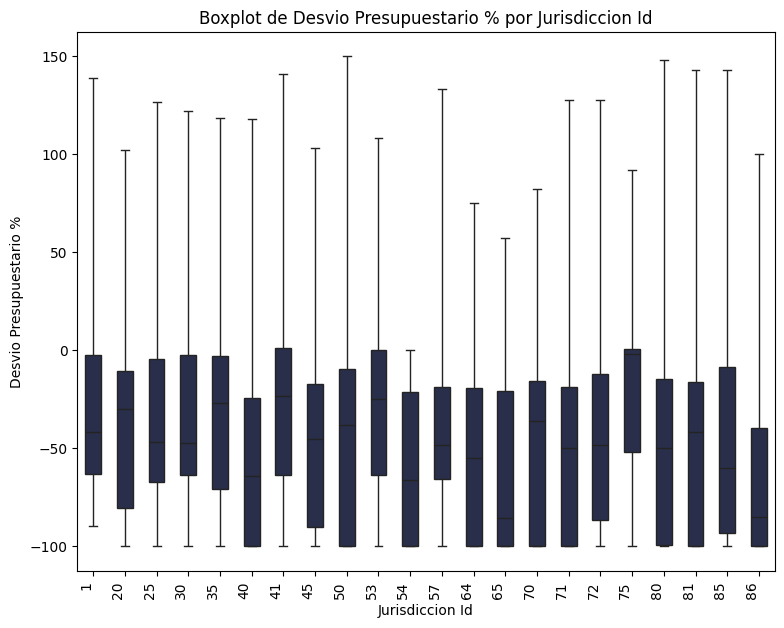

In [472]:
vertical_boxplot(df_copy, 'jurisdiccion_id', 'Desvio_Presupuestario_%', 'boxplot_concatenado.png' )

# Creación y entrenamiento del modelo

Luego de combinar los dataframes, separamos el mismo en train y test, teniendo lo ejecutado como target.

In [473]:
# Concatenar data y dfcombinado
x = df_concatenado.copy()

In [474]:
y = abs(pd.Series(x['ejecutado_vigente'])-1) #Seleccionamos el target

**Presentación de Modelos:**

In [475]:
x

,jurisdiccion_id,programacion,programacion_acumulada,ejecutado_vigente
0,20,1.004765e+06,1.004765e+06,774202.845405
1,20,1.479839e+04,1.479839e+04,14390.604078
2,20,7.346487e+04,7.346487e+04,57793.112193
3,20,6.731503e+04,6.731503e+04,61902.137858
4,20,4.095811e+06,0.000000e+00,0.000000
...,...,...,...,...
27008,50,7.744434e-02,2.194256e-01,0.074217
27009,50,3.226847e-02,8.389803e-02,0.045176
27010,50,7.099064e-02,2.678283e-01,0.093579
27011,50,3.872217e-02,1.161665e-01,0.083898


In [476]:
y

0        774201.845405
1         14389.604078
2         57792.112193
3         61901.137858
4             1.000000
             ...      
27008         0.925783
27009         0.954824
27010         0.906421
27011         0.916102
27012         0.996773
Name: ejecutado_vigente, Length: 27013, dtype: float64

**Separación de modelos Train y Test:**

In [477]:
# Separamos en entrenamiento/test en razon 80/20 %
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [478]:
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestRegressor(random_state=1)
modelo.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [479]:
y_pred = modelo.predict(x_test) #Almacenamos la predicción del target en una variable

In [480]:
y_pred

array([1.00000000e+00, 1.96064594e+03, 1.00000000e+00, ...,
       3.13068732e+00, 2.08310926e+05, 3.30975918e+03])

In [481]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

11383136.887595298

Cálculo de **Error Absoluto Medio (MAE)**: Calcula la media de las diferencias absolutas entre las predicciones y los valores reales. Cuanto más bajo, mejor.

In [482]:
y_pred = modelo.predict(x_test)
from sklearn.metrics import mean_squared_error

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
# Calcular el RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Errror:",rmse)
print("Error Absoluto Medio:",mse)

Root Mean Squared Errror: 740272835.3950559
Error Absoluto Medio: 5.480038708238355e+17


**Coeficiente de Determinación (R^2)**: Proporciona una medida de la proporción de la variabilidad en la variable objetivo que es predecible a partir de las variables independientes. Un R^2 cercano a 1 indica un buen ajuste.

In [483]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8295042312882871

**Cálculo de Validación Cruzada**. El mismo divide en dos conjuntos complementarios los datos de muestra, realiza el análisis en el primer subconjunto y luego testea en el segundo conjunto. De ésta forma la función de aproximación sólo se ajusta con el conjunto de datos de entrenamiento y luego calcula los valores de salida para el conjunto de datos de prueba

In [484]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, x, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([9.74901942e+08, 1.68219019e+06, 6.82298311e+08, 1.30212041e+07,
       2.99995300e+02])

# Regularización del modelo

Luego de notar métricas atípicas, probaremos regularizar el modelo para obtener mejores resultados.

In [485]:
from sklearn.linear_model import Ridge
modelo = Ridge(alpha=1.0)
modelo.fit(x_train, y_train)  # Ajustar el modelo a los datos de entrenamiento
y_pred = modelo.predict(x_test)  # Hacer predicciones en los datos de prueba

C:\Users\mjhfernandez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.30255e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [486]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

0.9049840993482865

In [487]:
y_pred = modelo.predict(x_test)
from sklearn.metrics import mean_squared_error

# Cálculo de métricas de regresión
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("R cuadrado (R²):", r2)

Error cuadrático medio (MSE): 0.881298968997551
Error absoluto medio (MAE): 0.9049840993482865
R cuadrado (R²): 1.0


# Segunda ronda de feature engineering 

La una de las features que podrían re adecuarse es el de la función del gasto. En ambos datasets se encuentran las variables categóricas que podrían sustituirse de la siguiente manera:

```Legislativo```	por	```Legislativa```

```Administração```	por	```Control de la Gestión Pública```

```Segurança Pública```	por	```Seguridad Interior```

```Reserva de contingência```	por	```Administración Fiscal```

```Taxas especiais```	por	```Dirección Superior Ejecutiva```

```Comunicações```	por	```Comunicaciones```

```Segurança social```	por	```Seguridad Social```

```Direitos de cidadania```	por	```Promoción y Asistencia Social```

```Gestão ambiental```	por	```Ecología y Desarrollo Sostenible```

```Agricultura```	por	```Agricultura, Ganadería y Pesca```

```organização agrária```	por	```Agricultura, Ganadería y Pesca```

```Ciência e Tecnologia```	por	```Ciencia, Tecnología e Innovación```

```Indústria```	por	```Industria```

```Trabalhar```	por	```Trabajo```

```Negócios e serviços```	por	```Comercio, Turismo y Otros Servicios```

```Assistência Social```	por	```Promoción y Asistencia Social```

```Energia```	por	```Energía, Combustibles y Minería```

```Urbanismo```	por	```Vivienda y Urbanismo```

```Educação```	por	```Educación y Cultura```

```Essencial para a justiça```	por	```Judicial```

```Cultura```	por	```Educación y Cultura```

```Relações Estrangeiras```	por	```Relaciones Exteriores```

```Saúde```	por	```Salud```

```Transporte```	por	```Transporte```

```Defesa nacional```	por	```Defensa```

```Saneamento```	por	```Seguros y Finanzas```

```Alojamento```	por	```Vivienda y Urbanismo```

```Esportes e lazer```	por	```Promoción y Asistencia Social```


In [488]:
import pandas as pd

# Diccionario de mapeo
mapeo = {
    1: 1,
    4: 7,
    6: 10,
    99: 6,
    28: 3,
    24: 21,
    9: 14,
    14: 13,
    18: 23,
    20: 24,
    21: 24,
    19: 16,
    22: 25,
    11: 17,
    23: 26,
    8: 13,
    25: 20,
    15: 18,
    12: 15,
    3: 2,
    13: 15,
    7: 4,
    10: 12,
    26: 22,
    5: 9,
    17: 27,
    16: 18,
    27: 13
}

# Reemplazar valores en la columna `CÓDIGO FUNÇÃO`
data['CÓDIGO FUNÇÃO'] = data['CÓDIGO FUNÇÃO'].replace(mapeo)
data

,EXERCÍCIO,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO SUBORDINADO,NOME ÓRGÃO SUBORDINADO,CÓDIGO UNIDADE ORÇAMENTÁRIA,NOME UNIDADE ORÇAMENTÁRIA,CÓDIGO FUNÇÃO,NOME FUNÇÃO,CÓDIGO SUBFUNÇÃO,...,NOME CATEGORIA ECONÔMICA,CÓDIGO GRUPO DE DESPESA,NOME GRUPO DE DESPESA,CÓDIGO ELEMENTO DE DESPESA,NOME ELEMENTO DE DESPESA,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO REALIZADO (R$),Desvio_Presupuestario_%,ORÇAMENTO ATUALIZADO (R$)_bin
1,2019,20,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,20204,INST.NAC.DE TECNOLOGIA DA INFORMACAO-ITI,7,Administração,125,...,DESPESAS CORRENTES,3,Outras Despesas Correntes,39,Outros Serviços de Terceiros - Pessoa Jurídica,1.004765e+06,1.004765e+06,774202.845405,-22.946865,13
2,2019,20,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,20204,INST.NAC.DE TECNOLOGIA DA INFORMACAO-ITI,7,Administração,125,...,DESPESAS CORRENTES,3,Outras Despesas Correntes,47,Obrigações Tributárias e Contributivas,1.479839e+04,1.479839e+04,14390.604078,-2.755641,5
3,2019,20,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,20204,INST.NAC.DE TECNOLOGIA DA INFORMACAO-ITI,7,Administração,125,...,DESPESAS CORRENTES,3,Outras Despesas Correntes,18,Auxílio Financeiro a Estudantes,7.346487e+04,7.346487e+04,57793.112193,-21.332311,8
4,2019,20,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,20204,INST.NAC.DE TECNOLOGIA DA INFORMACAO-ITI,7,Administração,125,...,DESPESAS CORRENTES,3,Outras Despesas Correntes,33,Passagens e Despesas com Locomoção,6.731503e+04,6.731503e+04,61902.137858,-8.041132,7
5,2019,20,Presidência da República,20101,Presidência da República,20101,PRESIDENCIA DA REPUBLICA,7,Administração,122,...,DESPESAS CORRENTES,3,Outras Despesas Correntes,0,Não informado,4.095811e+06,0.000000e+00,0.000000,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25323,2019,86,"Ministério da Mulher, Família e Direitos Humanos",81000,"Ministério da Mulher, Família e Direitos Human...",81101,MINISTERIO DOS DIREITOS HUMANOS - MDH,13,Direitos da cidadania,122,...,DESPESAS DE CAPITAL,4,Investimentos,52,Equipamentos e Material Permanente,5.122743e+04,5.122743e+04,0.000000,-100.000000,7
25324,2019,86,"Ministério da Mulher, Família e Direitos Humanos",81000,"Ministério da Mulher, Família e Direitos Human...",81101,MINISTERIO DOS DIREITOS HUMANOS - MDH,13,Direitos da cidadania,122,...,DESPESAS CORRENTES,3,Outras Despesas Correntes,0,Não informado,2.648561e+06,0.000000e+00,0.000000,NaN,0
25325,2019,86,"Ministério da Mulher, Família e Direitos Humanos",81000,"Ministério da Mulher, Família e Direitos Human...",81101,MINISTERIO DOS DIREITOS HUMANOS - MDH,13,Direitos da cidadania,122,...,DESPESAS CORRENTES,3,Outras Despesas Correntes,35,Serviços de Consultoria,4.087719e+04,4.087719e+04,40877.188578,0.000000,6
25326,2019,86,"Ministério da Mulher, Família e Direitos Humanos",81000,"Ministério da Mulher, Família e Direitos Human...",81101,MINISTERIO DOS DIREITOS HUMANOS - MDH,13,Direitos da cidadania,122,...,DESPESAS CORRENTES,3,Outras Despesas Correntes,30,Material de Consumo,6.991257e+04,6.991257e+04,27138.572733,-61.182129,8


In [489]:
# Eliminar las columnas especificadas
columnas_a_dropear = ['EXERCÍCIO', 'NOME ÓRGÃO SUPERIOR', 'CÓDIGO ÓRGÃO SUBORDINADO', 'NOME ÓRGÃO SUBORDINADO',
                      'CÓDIGO UNIDADE ORÇAMENTÁRIA', 'NOME UNIDADE ORÇAMENTÁRIA', 'NOME FUNÇÃO',
                      'CÓDIGO SUBFUNÇÃO', 'NOME SUBFUNÇÃO', 'CÓDIGO PROGRAMA ORÇAMENTÁRIO', 'NOME PROGRAMA ORÇAMENTÁRIO',
                      'CÓDIGO AÇÃO', 'NOME AÇÃO', 'CÓDIGO CATEGORIA ECONÔMICA', 'NOME CATEGORIA ECONÔMICA',
                      'CÓDIGO GRUPO DE DESPESA', 'NOME GRUPO DE DESPESA', 'CÓDIGO ELEMENTO DE DESPESA',
                      'NOME ELEMENTO DE DESPESA', 'Desvio_Presupuestario_%', 'ORÇAMENTO ATUALIZADO (R$)_bin']

data_new = data.drop(columns=columnas_a_dropear)
data_new

,CÓDIGO ÓRGÃO SUPERIOR,CÓDIGO FUNÇÃO,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO REALIZADO (R$)
1,20,7,1.004765e+06,1.004765e+06,774202.845405
2,20,7,1.479839e+04,1.479839e+04,14390.604078
3,20,7,7.346487e+04,7.346487e+04,57793.112193
4,20,7,6.731503e+04,6.731503e+04,61902.137858
5,20,7,4.095811e+06,0.000000e+00,0.000000
...,...,...,...,...,...
25323,86,13,5.122743e+04,5.122743e+04,0.000000
25324,86,13,2.648561e+06,0.000000e+00,0.000000
25325,86,13,4.087719e+04,4.087719e+04,40877.188578
25326,86,13,6.991257e+04,6.991257e+04,27138.572733


In [490]:
# Renombrar las columnas utilizando el diccionario de mapeo
nuevos_nombres = {
    'ORÇAMENTO INICIAL (R$)': 'programacion',
    'ORÇAMENTO ATUALIZADO (R$)': 'programacion_acumulada',
    'ORÇAMENTO REALIZADO (R$)': 'ejecutado_vigente',
    'CÓDIGO ÓRGÃO SUPERIOR': 'jurisdiccion_id',
    'CÓDIGO FUNÇÃO': 'funcion_id'

}

data_new = data_new.rename(columns=nuevos_nombres)

In [491]:
data_new

,jurisdiccion_id,funcion_id,programacion,programacion_acumulada,ejecutado_vigente
1,20,7,1.004765e+06,1.004765e+06,774202.845405
2,20,7,1.479839e+04,1.479839e+04,14390.604078
3,20,7,7.346487e+04,7.346487e+04,57793.112193
4,20,7,6.731503e+04,6.731503e+04,61902.137858
5,20,7,4.095811e+06,0.000000e+00,0.000000
...,...,...,...,...,...
25323,86,13,5.122743e+04,5.122743e+04,0.000000
25324,86,13,2.648561e+06,0.000000e+00,0.000000
25325,86,13,4.087719e+04,4.087719e+04,40877.188578
25326,86,13,6.991257e+04,6.991257e+04,27138.572733


In [492]:
# Diccionario de mapeo de funcion_desc a funcion_id
mapeo_funciones = {
    'Legislativa': 1,
    'Judicial': 2,
    'Dirección Superior Ejecutiva': 3,
    'Relaciones Exteriores': 4,
    'Relaciones Interiores': 5,
    'Administración Fiscal': 6,
    'Control de la Gestión Pública': 7,
    'Información y Estadística Básicas': 8,
    'Defensa': 9,
    'Seguridad Interior': 10,
    'Sistema Penal': 11,
    'Salud': 12,
    'Promoción y Asistencia Social': 13,
    'Seguridad Social': 14,
    'Educación y Cultura': 15,
    'Ciencia, Tecnología e Innovación': 16,
    'Trabajo': 17,
    'Vivienda y Urbanismo': 18,
    'Agua Potable y Alcantarillado': 19,
    'Energía, Combustibles y Minería': 20,
    'Comunicaciones': 21,
    'Transporte': 22,
    'Ecología y Desarrollo Sostenible': 23,
    'Agricultura, Ganadería y Pesca': 24,
    'Industria': 25,
    'Comercio, Turismo y Otros Servicios': 26,
    'Seguros y Finanzas': 27
}

# Crear una nueva columna 'funcion_id' basada en 'funcion_desc'
df_new['funcion_id'] = df_new['funcion_desc'].replace(mapeo_funciones)


C:\Users\mjhfernandez\AppData\Local\Temp\ipykernel_11588\1473458662.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new['funcion_id'] = df_new['funcion_desc'].replace(mapeo_funciones)


In [493]:
#Eliminamos las columnas que son exclusivamente texto
columnas_a_eliminar = ['porc_desvio_acum','porcentaje_diferencia', 'ejercicio_presupuestario','finalidad_desc', 'funcion_desc', 'subjurisdiccion_desc', 'servicio_desc', 'programa_desc', 'subprograma_desc', 'tipo_medicion_fisica', 'medicion_fisica_desc', 'unidad_medida_desc', 'totalizador_avance_fisico', 'causa_desvio', 'causa_desvio_detalle', 'causa_desvio_comentario', 'ultima_actualizacion_fecha', 'jurisdiccion_desc','trimestre',	'finalidad_id', 'subjurisdiccion_id',	'servicio_id', 'programa_id',	'subprograma_id',	'medicion_fisica_id',	'unidad_medida_id', 'programacion_inicial_DA',	'programacion_inicial_ajustada',	'programacion_anual_vig', 'ejecutado_acumulado',	'programacion_bin']
df_x = df_new.drop(columns=columnas_a_eliminar)

In [494]:
df_x

,funcion_id,jurisdiccion_id,programacion,programacion_acumulada,ejecutado_vigente
0,1,1,48402.710552,48402.710552,8176.134237
1,1,1,193.610842,193.610842,198.218780
2,1,1,0.174250,0.174250,0.141981
3,1,1,9.680542,9.680542,10.396902
4,1,1,0.077444,0.077444,0.077444
...,...,...,...,...,...
5364,27,50,0.077444,0.219426,0.074217
5365,27,50,0.032268,0.083898,0.045176
5366,27,50,0.070991,0.267828,0.093579
5368,27,50,0.038722,0.116167,0.083898


In [495]:
# Concatenar los DataFrames
df_concatenado = pd.concat([data_new, df_x], ignore_index=True)
df_concatenado

,jurisdiccion_id,funcion_id,programacion,programacion_acumulada,ejecutado_vigente
0,20,7,1.004765e+06,1.004765e+06,774202.845405
1,20,7,1.479839e+04,1.479839e+04,14390.604078
2,20,7,7.346487e+04,7.346487e+04,57793.112193
3,20,7,6.731503e+04,6.731503e+04,61902.137858
4,20,7,4.095811e+06,0.000000e+00,0.000000
...,...,...,...,...,...
27008,50,27,7.744434e-02,2.194256e-01,0.074217
27009,50,27,3.226847e-02,8.389803e-02,0.045176
27010,50,27,7.099064e-02,2.678283e-01,0.093579
27011,50,27,3.872217e-02,1.161665e-01,0.083898


# Segunda creación y entrenamiento del modelo

Luego de combinar los dataframes, separamos el mismo en train y test, teniendo lo ejecutado como target.

In [496]:
# Concatenar data y dfcombinado
x = df_concatenado.copy()

In [497]:
y = abs(pd.Series(x['ejecutado_vigente'])-1) #Seleccionamos el target

In [498]:
x

,jurisdiccion_id,funcion_id,programacion,programacion_acumulada,ejecutado_vigente
0,20,7,1.004765e+06,1.004765e+06,774202.845405
1,20,7,1.479839e+04,1.479839e+04,14390.604078
2,20,7,7.346487e+04,7.346487e+04,57793.112193
3,20,7,6.731503e+04,6.731503e+04,61902.137858
4,20,7,4.095811e+06,0.000000e+00,0.000000
...,...,...,...,...,...
27008,50,27,7.744434e-02,2.194256e-01,0.074217
27009,50,27,3.226847e-02,8.389803e-02,0.045176
27010,50,27,7.099064e-02,2.678283e-01,0.093579
27011,50,27,3.872217e-02,1.161665e-01,0.083898


In [499]:
y

0        774201.845405
1         14389.604078
2         57792.112193
3         61901.137858
4             1.000000
             ...      
27008         0.925783
27009         0.954824
27010         0.906421
27011         0.916102
27012         0.996773
Name: ejecutado_vigente, Length: 27013, dtype: float64

In [500]:
# Separamos en entrenamiento/test en razon 80/20 %
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [501]:
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestRegressor(random_state=1)
modelo.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [502]:
y_pred = modelo.predict(x_test) #Almacenamos la predicción del target en una variable

In [503]:
y_pred

array([1.00000000e+00, 1.96059659e+03, 1.00000000e+00, ...,
       3.12484672e+00, 2.08341585e+05, 3.30927303e+03])

In [504]:
# Cálculo de métricas de regresión
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("R cuadrado (R²):", r2)

Error cuadrático medio (MSE): 5.468144991921858e+17
Error absoluto medio (MAE): 11173756.216670383
R cuadrado (R²): 0.8298742703362179


In [505]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, x, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([9.71675736e+08, 3.47737245e+06, 4.95302981e+08, 1.07381462e+07,
       2.94629726e+02])

# Automated feature engineering

In [506]:
# Crear una entidad principal
es = ft.EntitySet(id="budget")

# Agregar el DataFrame como una entidad
es = es.add_dataframe(dataframe_name="budget", dataframe=df_x, index="index")

# Realizar la transformación de características
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name="budget", max_depth=2, verbose=True)


C:\Users\mjhfernandez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index index not found in dataframe, creating new integer column
  warnings.warn(
C:\Users\mjhfernandez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


Built 5 features
Elapsed: 00:00 | Progress: 100%|██████████


In [507]:
# Mostrar la dimensión del DataFrame transformado
print("Dimensión del DataFrame transformado:", feature_matrix.shape)
feature_matrix.head()

Dimensión del DataFrame transformado: (5002, 5)


,funcion_id,jurisdiccion_id,programacion,programacion_acumulada,ejecutado_vigente
index,,,,,
0,1,1,48402.710552,48402.710552,8176.134237
1,1,1,193.610842,193.610842,198.218780
2,1,1,0.174250,0.174250,0.141981
3,1,1,9.680542,9.680542,10.396902
4,1,1,0.077444,0.077444,0.077444


# Tercer ronda de entrenamiento de modelo

In [508]:
y = abs(pd.Series(feature_matrix['ejecutado_vigente'])-1) #Seleccionamos el target

In [509]:
# Separamos en entrenamiento/test en razon 80/20 %
x_train, x_test, y_train, y_test = train_test_split(feature_matrix,y,test_size=0.2, random_state=1)

In [510]:
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestRegressor(random_state=1)
modelo.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [511]:
y_pred = modelo.predict(x_test) #Almacenamos la predicción del target en una variable
y_pred

array([2.22333011, 3.46537593, 1.24482091, ..., 0.99677315, 0.65295257,
       0.98386576])

In [512]:
# Cálculo de métricas de regresión
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("R cuadrado (R²):", r2)

Error cuadrático medio (MSE): 309608.54781274695
Error absoluto medio (MAE): 30.02949460994046
R cuadrado (R²): 0.999133982094565


In [513]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, feature_matrix, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([ 3276.85364699, 80198.57213067,   345.47030742, 30547.70342217,
       58585.49870929])

# CrossValidation

In [514]:
# Definir los algoritmos de clasificación a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Definir la estrategia de validación cruzada (3 folds)
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Función para calcular el RMSE a partir del puntaje negativo de MSE
def rmse(score):
    return np.sqrt(-score)

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Codificar todas las características categóricas en X
X_encoded = feature_matrix.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)

# Codificar las etiquetas de la variable objetivo y
y_encoded = label_encoder.fit_transform(y)

for model_name, model in models.items():
    print(f'Model: {model_name}')
    
    # Calcular RMSE
    scores_rmse = cross_val_score(model, X_encoded, y_encoded, cv=kf, scoring='neg_mean_squared_error')
    print(f'Scores for each fold (MSE): {scores_rmse}')
    print(f'Mean RMSE: {"{:.2f}".format(rmse(scores_rmse.mean()))}')
    
    # Calcular MAE
    scores_mae = cross_val_score(model, X_encoded, y_encoded, cv=kf, scoring='neg_mean_absolute_error')
    print(f'Scores for each fold (MAE): {scores_mae}')
    print(f'Mean MAE: {"{:.2f}".format(-scores_mae.mean())}')
    
    # Calcular R^2
    scores_r2 = cross_val_score(model, X_encoded, y_encoded, cv=kf, scoring='r2')
    print(f'Scores for each fold (R^2): {scores_r2}')
    print(f'Mean R^2: {"{:.2f}".format(scores_r2.mean())}\n')

Model: Linear Regression
Scores for each fold (MSE): [ -788824.92277739 -1363883.48116187  -255805.9111739 ]
Mean RMSE: 896.01
Scores for each fold (MAE): [-417.81993779 -445.58563208 -398.2226319 ]
Mean MAE: 420.54
Scores for each fold (R^2): [-2.07320166 -4.0225358   0.01834666]
Mean R^2: -2.03

Model: Decision Tree
Scores for each fold (MSE): [-3.05455635 -3.36112777 -2.73065387]
Mean RMSE: 1.75
Scores for each fold (MAE): [-0.90227818 -0.970006   -0.86262747]
Mean MAE: 0.91
Scores for each fold (R^2): [0.9999881  0.99998762 0.99998952]
Mean R^2: 1.00

Model: Random Forest
Scores for each fold (MSE): [-1.17221253 -1.21955789 -1.27753731]
Mean RMSE: 1.11
Scores for each fold (MAE): [-0.58291966 -0.61011398 -0.6105159 ]
Mean MAE: 0.60
Scores for each fold (R^2): [0.99999543 0.99999551 0.9999951 ]
Mean R^2: 1.00



# XGBoost

In [515]:
# Entrenamiento del modelo XGBoost
model = XGBRegressor()
model.fit(x_train, y_train)

# Predicciones en los datos de prueba
y_pred = model.predict(x_test)# Entrenamiento del modelo XGBoost
model = XGBRegressor()
model.fit(x_train, y_train)

# Predicciones en los datos de prueba
y_pred = model.predict(x_test)

In [516]:
# Cálculo de métricas de regresión
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("R cuadrado (R²):", r2)

Error cuadrático medio (MSE): 4229614.61478321
Error absoluto medio (MAE): 125.69693529006616
R cuadrado (R²): 0.9881691832626432
